- Author: Syeda Masooma Naqvi
- USC id: 3344388868
- GitHub id: SyedaMasooma-CS 

#### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import resample
import statsmodels.api as sm
import re
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.style.use('seaborn')
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metric
from sklearn import linear_model
from sklearn.svm import l1_min_c
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

Loading Test Data Files

In [5]:
#Test Data

#bending1
bend11 = pd.read_csv('./../data/AReM/bending1/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend12 = pd.read_csv('./../data/AReM/bending1/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#bending2
bend21 = pd.read_csv('./../data/AReM/bending2/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend22 = pd.read_csv('./../data/AReM/bending2/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#cycling
cyc1 = pd.read_csv('./../data/AReM/cycling/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc2 = pd.read_csv('./../data/AReM/cycling/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc3 = pd.read_csv('./../data/AReM/cycling/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#lying
ly1 = pd.read_csv('./../data/AReM/lying/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly2 = pd.read_csv('./../data/AReM/lying/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly3 = pd.read_csv('./../data/AReM/lying/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#sitting
sit1 = pd.read_csv('./../data/AReM/sitting/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit2 = pd.read_csv('./../data/AReM/sitting/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit3 = pd.read_csv('./../data/AReM/sitting/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#standing
stand1 = pd.read_csv('./../data/AReM/standing/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand2 = pd.read_csv('./../data/AReM/standing/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand3 = pd.read_csv('./../data/AReM/standing/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#walking
walk1 = pd.read_csv('./../data/AReM/walking/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk2 = pd.read_csv('./../data/AReM/walking/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk3 = pd.read_csv('./../data/AReM/walking/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')


In [6]:
# creating an identifier variable for each instance

bend11['dataset'] = 1
bend12['dataset'] = 2
bend21['dataset'] = 3
bend22['dataset'] = 4
cyc1['dataset'] = 5
cyc2['dataset'] = 6
cyc3['dataset'] = 7
ly1['dataset'] = 8
ly2['dataset'] = 9
ly3['dataset'] = 10
sit1['dataset'] = 11
sit2['dataset'] = 12 
sit3['dataset'] = 13 
walk1['dataset'] = 14
walk2['dataset'] = 15
walk3['dataset'] = 16
stand1['dataset'] = 17
stand2['dataset'] = 18
stand3['dataset'] = 19

In [7]:
test_list = [bend11,bend12,bend21,bend22,cyc1,cyc2,cyc3,ly1,ly2,ly3,sit1,sit2,sit3,walk1,walk2,walk3,stand1,stand2,stand3]

Concatenating the test datasets together

In [8]:
test = pd.concat(test_list,ignore_index=True)
test = test.rename(columns={'# Columns: time': 'time'})
test = test.drop(['time'],axis=1)
test

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0         39.25       0.43      22.75       0.43      33.75       1.30   
1         39.25       0.43      23.00       0.00      33.00       0.00   
2         39.25       0.43      23.25       0.43      33.00       0.00   
3         39.50       0.50      23.00       0.71      33.00       0.00   
4         39.50       0.50      24.00       0.00      33.00       0.00   
...         ...        ...        ...        ...        ...        ...   
9115      41.25       0.83      19.75       0.43      17.00       0.71   
9116      41.50       0.50      20.75       0.43      17.25       0.83   
9117      41.50       0.50      20.75       0.43      15.75       0.83   
9118      41.50       0.50      20.50       0.50      15.75       0.83   
9119      41.50       0.50      20.25       0.43      15.25       0.83   

      dataset  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
9115       19  
9116       19  
9117       19  
9118       19  
9119       19  

[9120 rows x 7 columns]

### Loading all the Train Datasets


In [9]:
#Loading all the Train Datasets

#bending1
bend13 = pd.read_csv('./../data/AReM/bending1/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend14 = pd.read_csv('./../data/AReM/bending1/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend15 = pd.read_csv('./../data/AReM/bending1/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend16 = pd.read_csv('./../data/AReM/bending1/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend17 = pd.read_csv('./../data/AReM/bending1/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#bending2
bend23 = pd.read_csv('./../data/AReM/bending2/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend24 = pd.read_csv('./../data/AReM/bending2/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend25 = pd.read_csv('./../data/AReM/bending2/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend26 = pd.read_csv('./../data/AReM/bending2/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#cycling
cyc4 = pd.read_csv('./../data/AReM/cycling/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc5 = pd.read_csv('./../data/AReM/cycling/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc6 = pd.read_csv('./../data/AReM/cycling/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc7 = pd.read_csv('./../data/AReM/cycling/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc8 = pd.read_csv('./../data/AReM/cycling/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc9 = pd.read_csv('./../data/AReM/cycling/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc10 = pd.read_csv('./../data/AReM/cycling/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc11 = pd.read_csv('./../data/AReM/cycling/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc12 = pd.read_csv('./../data/AReM/cycling/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc13 = pd.read_csv('./../data/AReM/cycling/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc14 = pd.read_csv('./../data/AReM/cycling/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc15 = pd.read_csv('./../data/AReM/cycling/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#lying
ly4 = pd.read_csv('./../data/AReM/lying/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly5 = pd.read_csv('./../data/AReM/lying/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly6 = pd.read_csv('./../data/AReM/lying/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly7 = pd.read_csv('./../data/AReM/lying/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly8 = pd.read_csv('./../data/AReM/lying/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly9 = pd.read_csv('./../data/AReM/lying/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly10 = pd.read_csv('./../data/AReM/lying/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly11 = pd.read_csv('./../data/AReM/lying/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly12 = pd.read_csv('./../data/AReM/lying/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly13 = pd.read_csv('./../data/AReM/lying/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly14 = pd.read_csv('./../data/AReM/lying/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly15 = pd.read_csv('./../data/AReM/lying/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#sitting
sit4 = pd.read_csv('./../data/AReM/sitting/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit5 = pd.read_csv('./../data/AReM/sitting/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit6 = pd.read_csv('./../data/AReM/sitting/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit7 = pd.read_csv('./../data/AReM/sitting/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit8 = pd.read_csv('./../data/AReM/sitting/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit9 = pd.read_csv('./../data/AReM/sitting/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit10 = pd.read_csv('./../data/AReM/sitting/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit11 = pd.read_csv('./../data/AReM/sitting/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit12 = pd.read_csv('./../data/AReM/sitting/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit13 = pd.read_csv('./../data/AReM/sitting/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit14 = pd.read_csv('./../data/AReM/sitting/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit15 = pd.read_csv('./../data/AReM/sitting/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#standing
stand4 = pd.read_csv('./../data/AReM/standing/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand5 = pd.read_csv('./../data/AReM/standing/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand6 = pd.read_csv('./../data/AReM/standing/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand7 = pd.read_csv('./../data/AReM/standing/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand8 = pd.read_csv('./../data/AReM/standing/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand9 = pd.read_csv('./../data/AReM/standing/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand10 = pd.read_csv('./../data/AReM/standing/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand11 = pd.read_csv('./../data/AReM/standing/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand12 = pd.read_csv('./../data/AReM/standing/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand13 = pd.read_csv('./../data/AReM/standing/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand14 = pd.read_csv('./../data/AReM/standing/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand15 = pd.read_csv('./../data/AReM/standing/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#walking
walk4 = pd.read_csv('./../data/AReM/walking/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk5 = pd.read_csv('./../data/AReM/walking/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk6 = pd.read_csv('./../data/AReM/walking/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk7 = pd.read_csv('./../data/AReM/walking/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk8 = pd.read_csv('./../data/AReM/walking/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk9 = pd.read_csv('./../data/AReM/walking/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk10 = pd.read_csv('./../data/AReM/walking/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk11 = pd.read_csv('./../data/AReM/walking/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk12 = pd.read_csv('./../data/AReM/walking/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk13 = pd.read_csv('./../data/AReM/walking/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk14 = pd.read_csv('./../data/AReM/walking/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk15 = pd.read_csv('./../data/AReM/walking/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')


In [10]:
# creating an identifier variable for each instance

bend13['dataset']=20
bend14['dataset']=21
bend15['dataset']=22
bend16['dataset']=23
bend17['dataset']=24
bend23['dataset']=25
bend24['dataset']=26
bend25['dataset']=27
bend26['dataset']=28
cyc4['dataset']=29
cyc5['dataset']=30
cyc6['dataset']=31
cyc7['dataset']=32
cyc8['dataset']=33
cyc9['dataset']=34
cyc10['dataset']=35
cyc11['dataset']=36
cyc12['dataset']=37
cyc13['dataset']=38
cyc14['dataset']=39
cyc15['dataset']=40
ly4['dataset']=41
ly5['dataset']=42
ly6['dataset']=43
ly7['dataset']=44
ly8['dataset']=45
ly9['dataset']=46
ly10['dataset']=47
ly11['dataset']=48
ly12['dataset']=49
ly13['dataset']=50
ly14['dataset']=51
ly15['dataset']=52
sit4['dataset']=53
sit5['dataset']=54
sit6['dataset']=55
sit7['dataset']=56
sit8['dataset']=57
sit9['dataset']=58
sit10['dataset']=59
sit11['dataset']=60
sit12['dataset']=61
sit13['dataset']=62
sit14['dataset']=63
sit15['dataset']=64
walk4['dataset']=65
walk5['dataset']=66
walk6['dataset']=67
walk7['dataset']=68
walk8['dataset']=69
walk9['dataset']=70
walk10['dataset']=71
walk11['dataset']=72
walk12['dataset']=73
walk13['dataset']=74
walk14['dataset']=75
walk15['dataset']=76
stand4['dataset']=77
stand5['dataset']=78
stand6['dataset']=79
stand7['dataset']=80
stand8['dataset']=81
stand9['dataset']=82
stand10['dataset']=83
stand11['dataset']=84
stand12['dataset']=85
stand13['dataset']=86
stand14['dataset']=87
stand15['dataset']=88

Concatenating train datasets together

In [11]:
train_list = [bend13,bend14,bend15,bend16,bend17,bend23,bend24,bend25,bend26,cyc4,
        cyc5,cyc6,cyc7,cyc8,cyc9,cyc10,cyc11,cyc12,cyc13,cyc14,cyc15,ly4,ly5,ly6,ly7,ly8,ly9,ly10,ly11,ly12,
        ly13,ly14,ly15,sit4,sit5,sit6,sit7,sit8,sit9,sit10,sit11,sit12,sit13,sit14,sit15,walk4,walk5,walk6,
        walk7,walk8,walk9,walk10,walk11,walk12,walk13,walk14,walk15,stand4,stand5,stand6,stand7,stand8,
                   stand9,stand10,stand11,stand12,stand13,stand14,stand15]
data_list = train_list + test_list

In [12]:

train = pd.concat(train_list,ignore_index=True)
train = train.rename(columns={'# Columns: time': 'time'})
train = train.drop(['time'],axis=1)
train

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0          42.00       0.71      21.25       0.43      30.00       0.00   
1          41.50       0.50      20.25       1.48      31.25       1.09   
2          41.50       0.50      14.25       1.92      33.00       0.00   
3          40.75       0.83      15.75       0.43      33.00       0.00   
4          40.00       0.71      20.00       2.74      32.75       0.43   
...          ...        ...        ...        ...        ...        ...   
33114      45.25       0.43      12.25       0.43      13.75       0.83   
33115      45.00       0.00      12.60       0.80      14.25       0.83   
33116      45.00       0.00      12.00       0.00      14.50       0.50   
33117      45.50       0.50      12.25       0.43      14.50       0.50   
33118      45.00       0.00      12.50       0.87      14.00       0.71   

       dataset  
0           20  
1           20  
2           20  
3           20  
4           20  
...        ...  
33114       88  
33115       88  
33116       88  
33117       88  
33118       88  

[33119 rows x 7 columns]

In [19]:
# Making a single dataset with train and test data

data = pd.concat([test,train],ignore_index=True)
data

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0          39.25       0.43      22.75       0.43      33.75       1.30   
1          39.25       0.43      23.00       0.00      33.00       0.00   
2          39.25       0.43      23.25       0.43      33.00       0.00   
3          39.50       0.50      23.00       0.71      33.00       0.00   
4          39.50       0.50      24.00       0.00      33.00       0.00   
...          ...        ...        ...        ...        ...        ...   
42234      45.25       0.43      12.25       0.43      13.75       0.83   
42235      45.00       0.00      12.60       0.80      14.25       0.83   
42236      45.00       0.00      12.00       0.00      14.50       0.50   
42237      45.50       0.50      12.25       0.43      14.50       0.50   
42238      45.00       0.00      12.50       0.87      14.00       0.71   

       dataset  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
42234       88  
42235       88  
42236       88  
42237       88  
42238       88  

[42239 rows x 7 columns]

#### Extracting Time Domain Features

In [20]:
result=data.groupby('dataset',as_index = False).agg(['mean','min','max','median','std'])
result.columns = ['_'.join(col).strip() for col in result.columns.values]



In [21]:
r1=data.groupby('dataset',as_index = False).quantile(0.25)
r1=r1.add_suffix('_1stquartile')
r1=r1.rename(columns={'dataset_1stquartile':'dataset'})
r2=data.groupby('dataset',as_index = False).quantile(0.75)
r2=r2.add_suffix('_3rdquart')
r2=r2.rename(columns={'dataset_3rdquart':'dataset'})

In [22]:
result =pd.merge(pd.merge(r1,r2,on='dataset'),result,on='dataset')
df_vis = result.copy()
result = result.rename(columns={'dataset': 'instance'})
result.set_index('instance', inplace=True)
result

avg_rss12_1stquartile  var_rss12_1stquartile  avg_rss13_1stquartile  \
instance                                                                        
1                       39.2500                    0.0                16.0000   
2                       42.0000                    0.0                19.0000   
3                       23.1875                    0.0                18.0000   
4                       25.5000                    0.0                18.0000   
5                       34.5000                    1.3                14.2500   
...                         ...                    ...                    ...   
84                      41.0000                    0.0                 9.7300   
85                      42.0000                    0.0                11.0000   
86                      40.0000                    0.0                11.6275   
87                      39.7500                    0.0                10.6700   
88                      44.6275                    0.0                12.0000   

          var_rss13_1stquartile  avg_rss23_1stquartile  var_rss23_1stquartile  \
instance                                                                        
1                          0.00                33.0000                   0.00   
2                          0.00                32.0000                   0.00   
3                          0.00                20.5000                   0.43   
4                          0.00                15.0000                   0.47   
5                          1.64                17.9500                   1.50   
...                         ...                    ...                    ...   
84                         0.43                12.6275                   0.47   
85                         0.00                14.0000                   0.43   
86                         0.00                12.7500                   0.43   
87                         0.00                16.5000                   0.43   
88                         0.00                11.0000                   0.50   

          avg_rss12_3rdquart  var_rss12_3rdquart  avg_rss13_3rdquart  \
instance                                                               
1                      42.00                0.50             23.2500   
2                      43.67                0.50             22.2500   
3                      26.50                0.71             22.0000   
4                      30.00                0.50             22.5000   
5                      40.25                3.13             19.0000   
...                      ...                 ...                 ...   
84                     44.50                0.50             17.5000   
85                     44.33                0.50             13.3300   
86                     44.75                0.50             14.3300   
87                     45.00                0.50             15.0625   
88                     45.75                0.50             15.5000   

          var_rss13_3rdquart  avg_rss23_3rdquart  var_rss23_3rdquart  \
instance                                                               
1                     1.1200               36.00                1.30   
2                     1.1450               34.50                1.30   
3                     0.8700               27.00                0.87   
4                     0.9400               20.75                1.30   
5                     3.9175               21.75                3.90   
...                      ...                 ...                 ...   
84                    1.0200               17.50                1.22   
85                    0.8300               16.69                0.95   
86                    0.8200               16.50                0.94   
87                    0.8700               21.00                0.83   
88                    0.8300               14.67                1.50   

          avg_rss12_mean  av

### HW 4
- Q2.

In [23]:
# Only keeping variables 1,2,6 and mean,median and standard deviation

filtered_cols = result.filter(regex='(var_rss12|avg_rss12|var_rss23)')
filtered_cols = filtered_cols.filter(regex='(mean|median|std)')
filtered_cols

avg_rss12_mean  avg_rss12_median  avg_rss12_std  var_rss12_mean  \
instance                                                                    
1              40.624792             40.50       1.476967        0.358604   
2              42.812812             42.50       1.435550        0.372438   
3              24.562958             24.25       3.737514        0.590833   
4              27.464604             28.00       3.583582        0.449708   
5              37.177042             36.25       3.581301        2.374208   
...                  ...               ...            ...             ...   
84             42.516958             42.50       2.195751        0.440688   
85             42.959354             42.67       1.500878        0.352875   
86             42.674583             43.67       2.384170        0.419167   
87             43.187521             44.75       2.491162        0.271271   
88             44.441187             45.00       2.417797        0.346604   

          var_rss12_median  var_rss12_std  var_rss23_mean  var_rss23_median  \
instance                                                                      
1                     0.43       0.322605        0.570583              0.43   
2                     0.47       0.289158        0.571083              0.43   
3                     0.43       0.837408        0.700187              0.50   
4                     0.43       0.767197        1.122125              0.83   
5                     1.92       1.601799        2.921729              2.50   
...                    ...            ...             ...               ...   
84                    0.47       0.349430        0.977417              0.83   
85                    0.47       0.313585        0.748479              0.82   
86                    0.47       0.368383        0.702042              0.50   
87                    0.00       0.328807        0.645458              0.50   
88                    0.43       0.358113        1.155083              0.94   

          var_rss23_std  
instance                 
1              0.582915  
2              0.601010  
3              0.693720  
4              1.012342  
5              1.852600  
...                 ...  
84             0.853280  
85             0.461152  
86             0.567451  
87             0.567419  
88             0.842087  

[88 rows x 9 columns]

In [24]:
filtered_cols['dataset'] = 'other' 
filtered_cols.loc[0:4, 'dataset'] = 'bending'
filtered_cols.loc[0:4, 'dataset'] = 'bending'
filtered_cols.loc[20:28, 'dataset'] = 'bending'

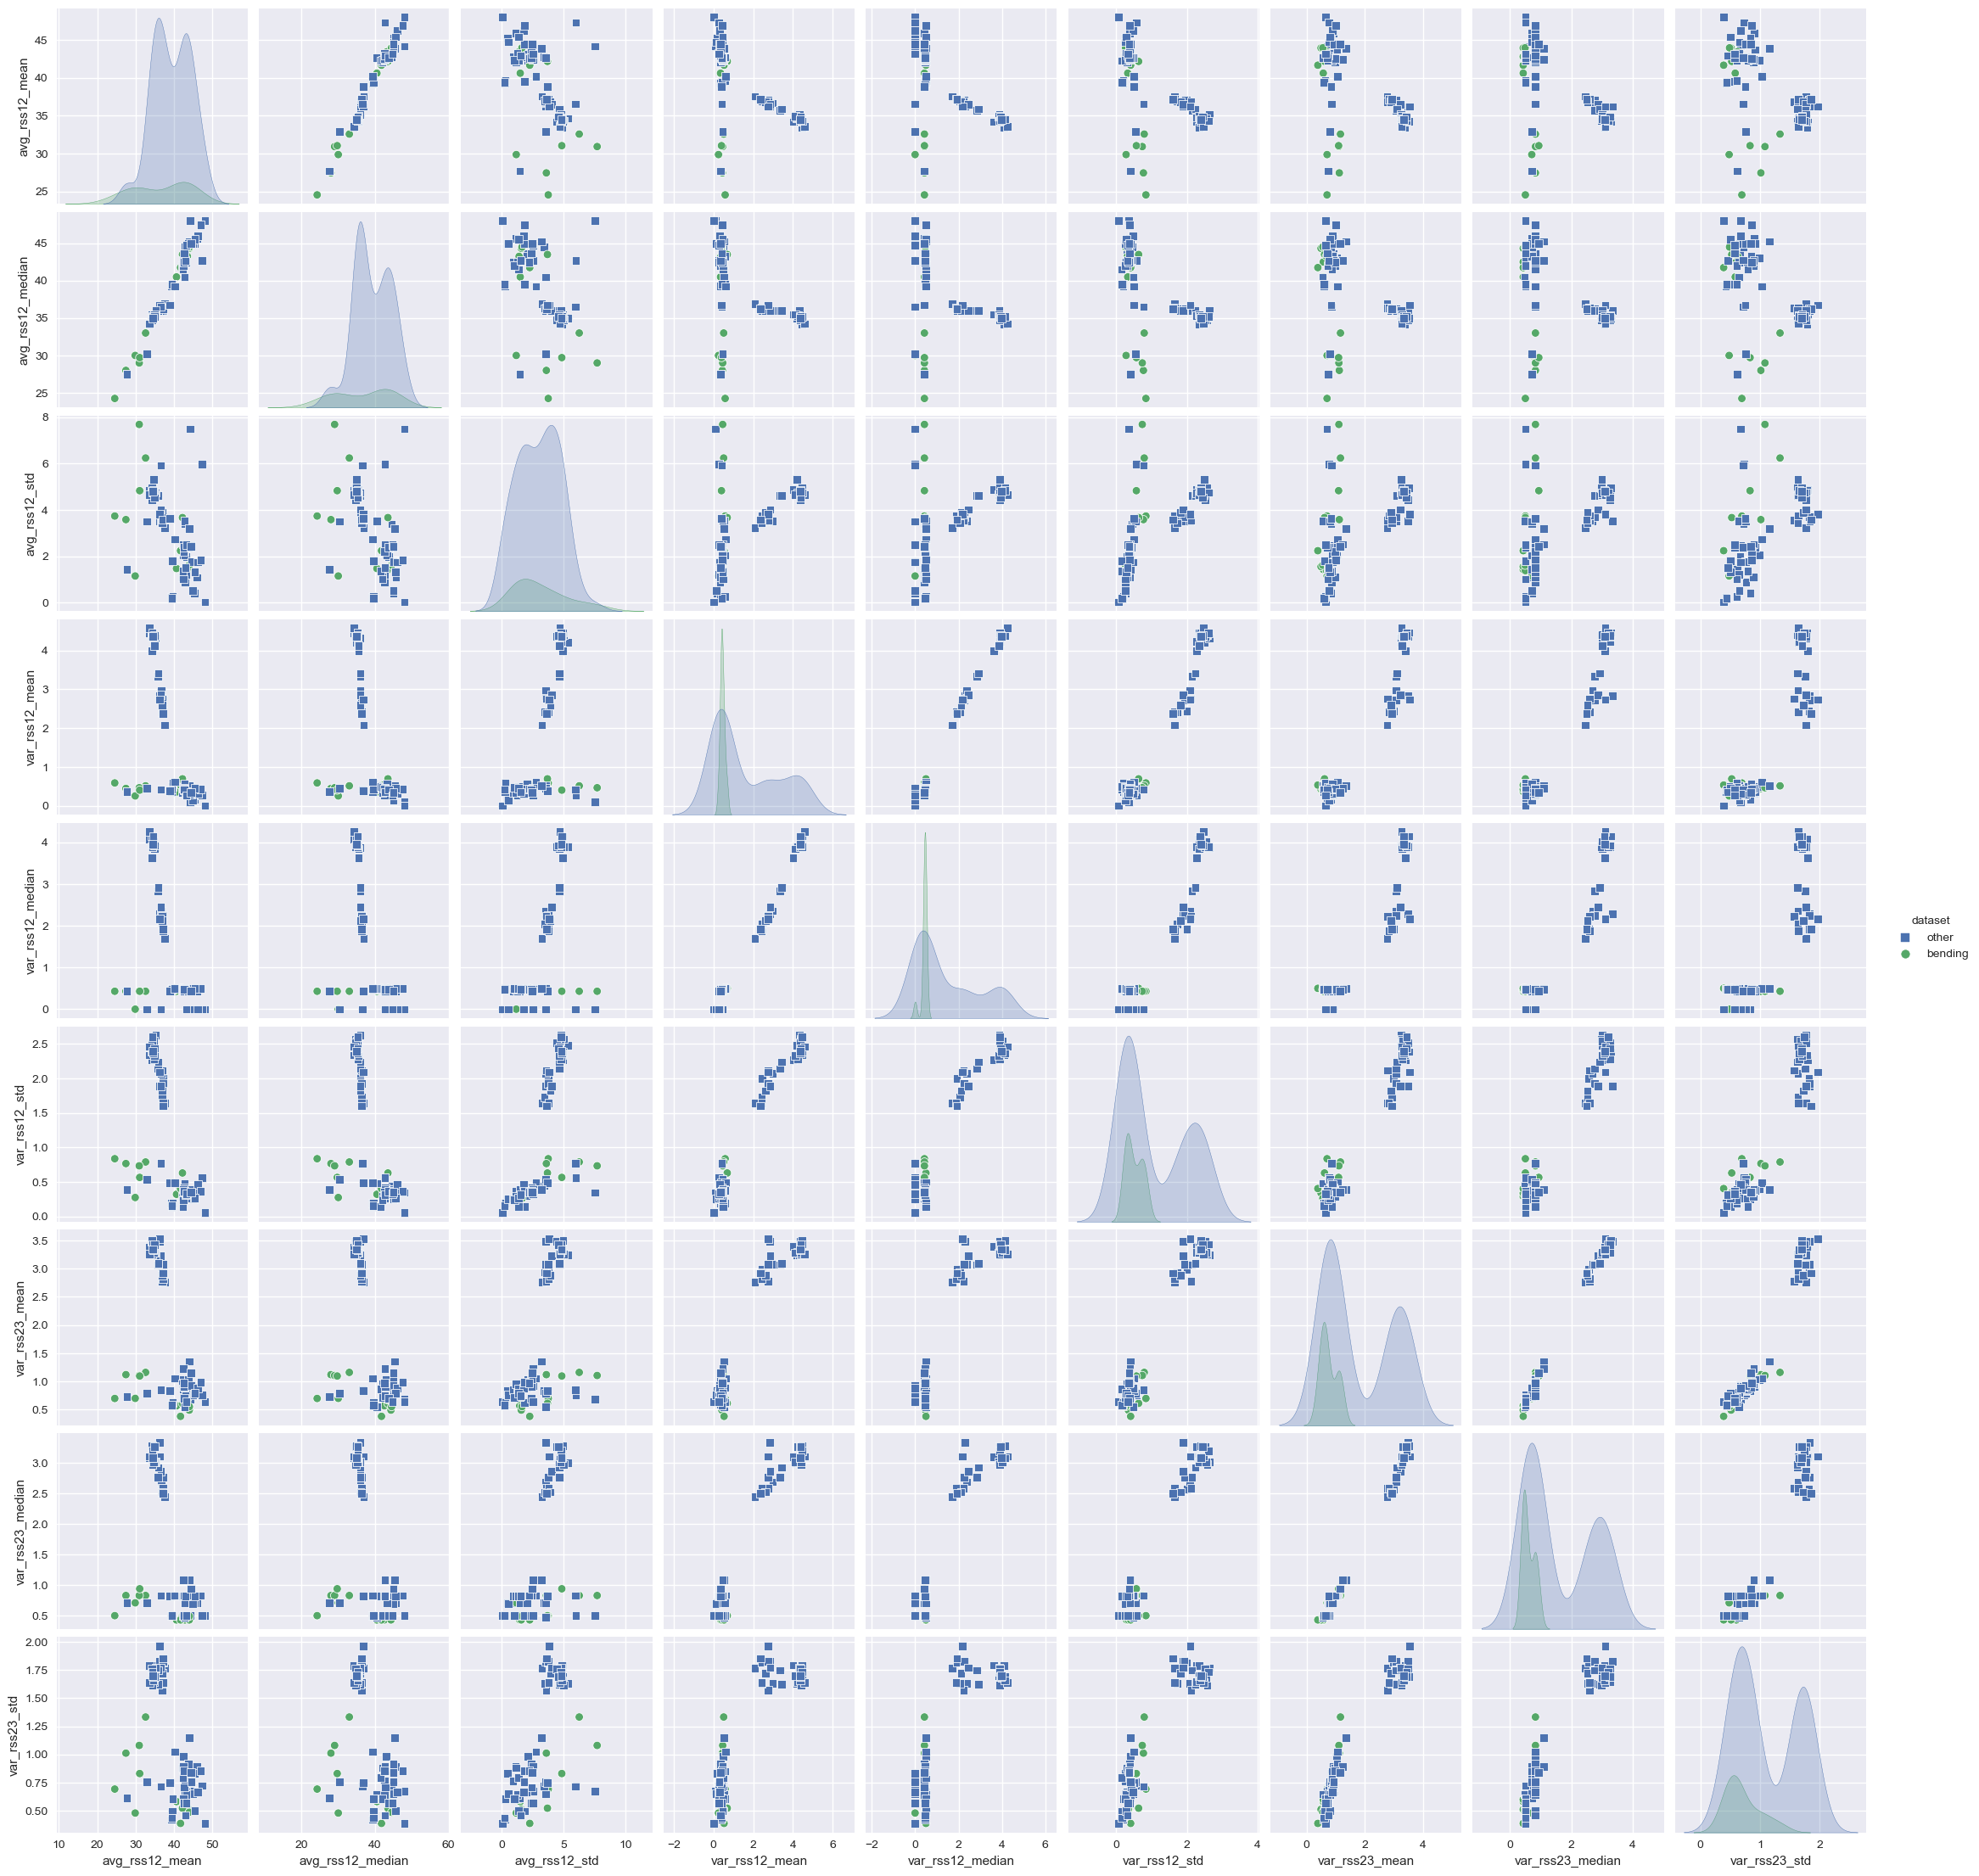

In [401]:
# 2a.i

sns.pairplot(filtered_cols, hue = 'dataset',markers=["o", "s",], hue_order=['other','bending'])
plt.show()

### 2.a.ii

In [25]:
# Splitting dataset equally and making 12 features

gl = globals()
def split(dataset):
#     x = dataset.shape[0]
    df1 = dataset.iloc[241:,:]
    df1 = df1.reset_index(drop=True)
    df2 = dataset.iloc[:240,:]
    df2 = df2.reset_index(drop=True)
    df2 = df2.rename(columns={'avg_rss12': 'avg_rss12_d', 'var_rss12': 'var_rss12_d'
                             , 'avg_rss13': 'avg_rss13_d', 'avg_rss13': 'avg_rss13_d'
                             , 'avg_rss23': 'avg_rss23_d', 'var_rss23': 'var_rss23_d'})
    df1 = df1.drop(['dataset'],axis=1)
    df = pd.concat([df1,df2], axis=1)
    df = df.drop(['# Columns: time'],axis=1)
#     print(df1)
    return df
k=1
for i in data_list:
#     x = ['data' + i]
    gl['dataset%s' % k]=split(i)
    i=i+1
    k=k+1
    

In [26]:
df_list = []
for i in range(1,89):
    filename = gl['dataset%s' % i]
#     filename = f'dataset{i}'  
    df_list.append(filename)
concatenated_df = pd.concat(df_list, ignore_index=True)


In [27]:
newresult=concatenated_df.groupby('dataset',as_index = False).agg(['mean','median','std'])
newresult.columns = ['_'.join(col).strip() for col in newresult.columns.values]
new_cols = newresult.filter(regex='(var_rss12|avg_rss12|var_rss23)')
# filtered_cols = filtered_cols.filter(regex='(mean|median|std)')


In [28]:
new_cols['dataset'] = 'other' 
new_cols.loc[0:4, 'dataset'] = 'bending'
new_cols.loc[0:4, 'dataset'] = 'bending'
new_cols.loc[20:28, 'dataset'] = 'bending'

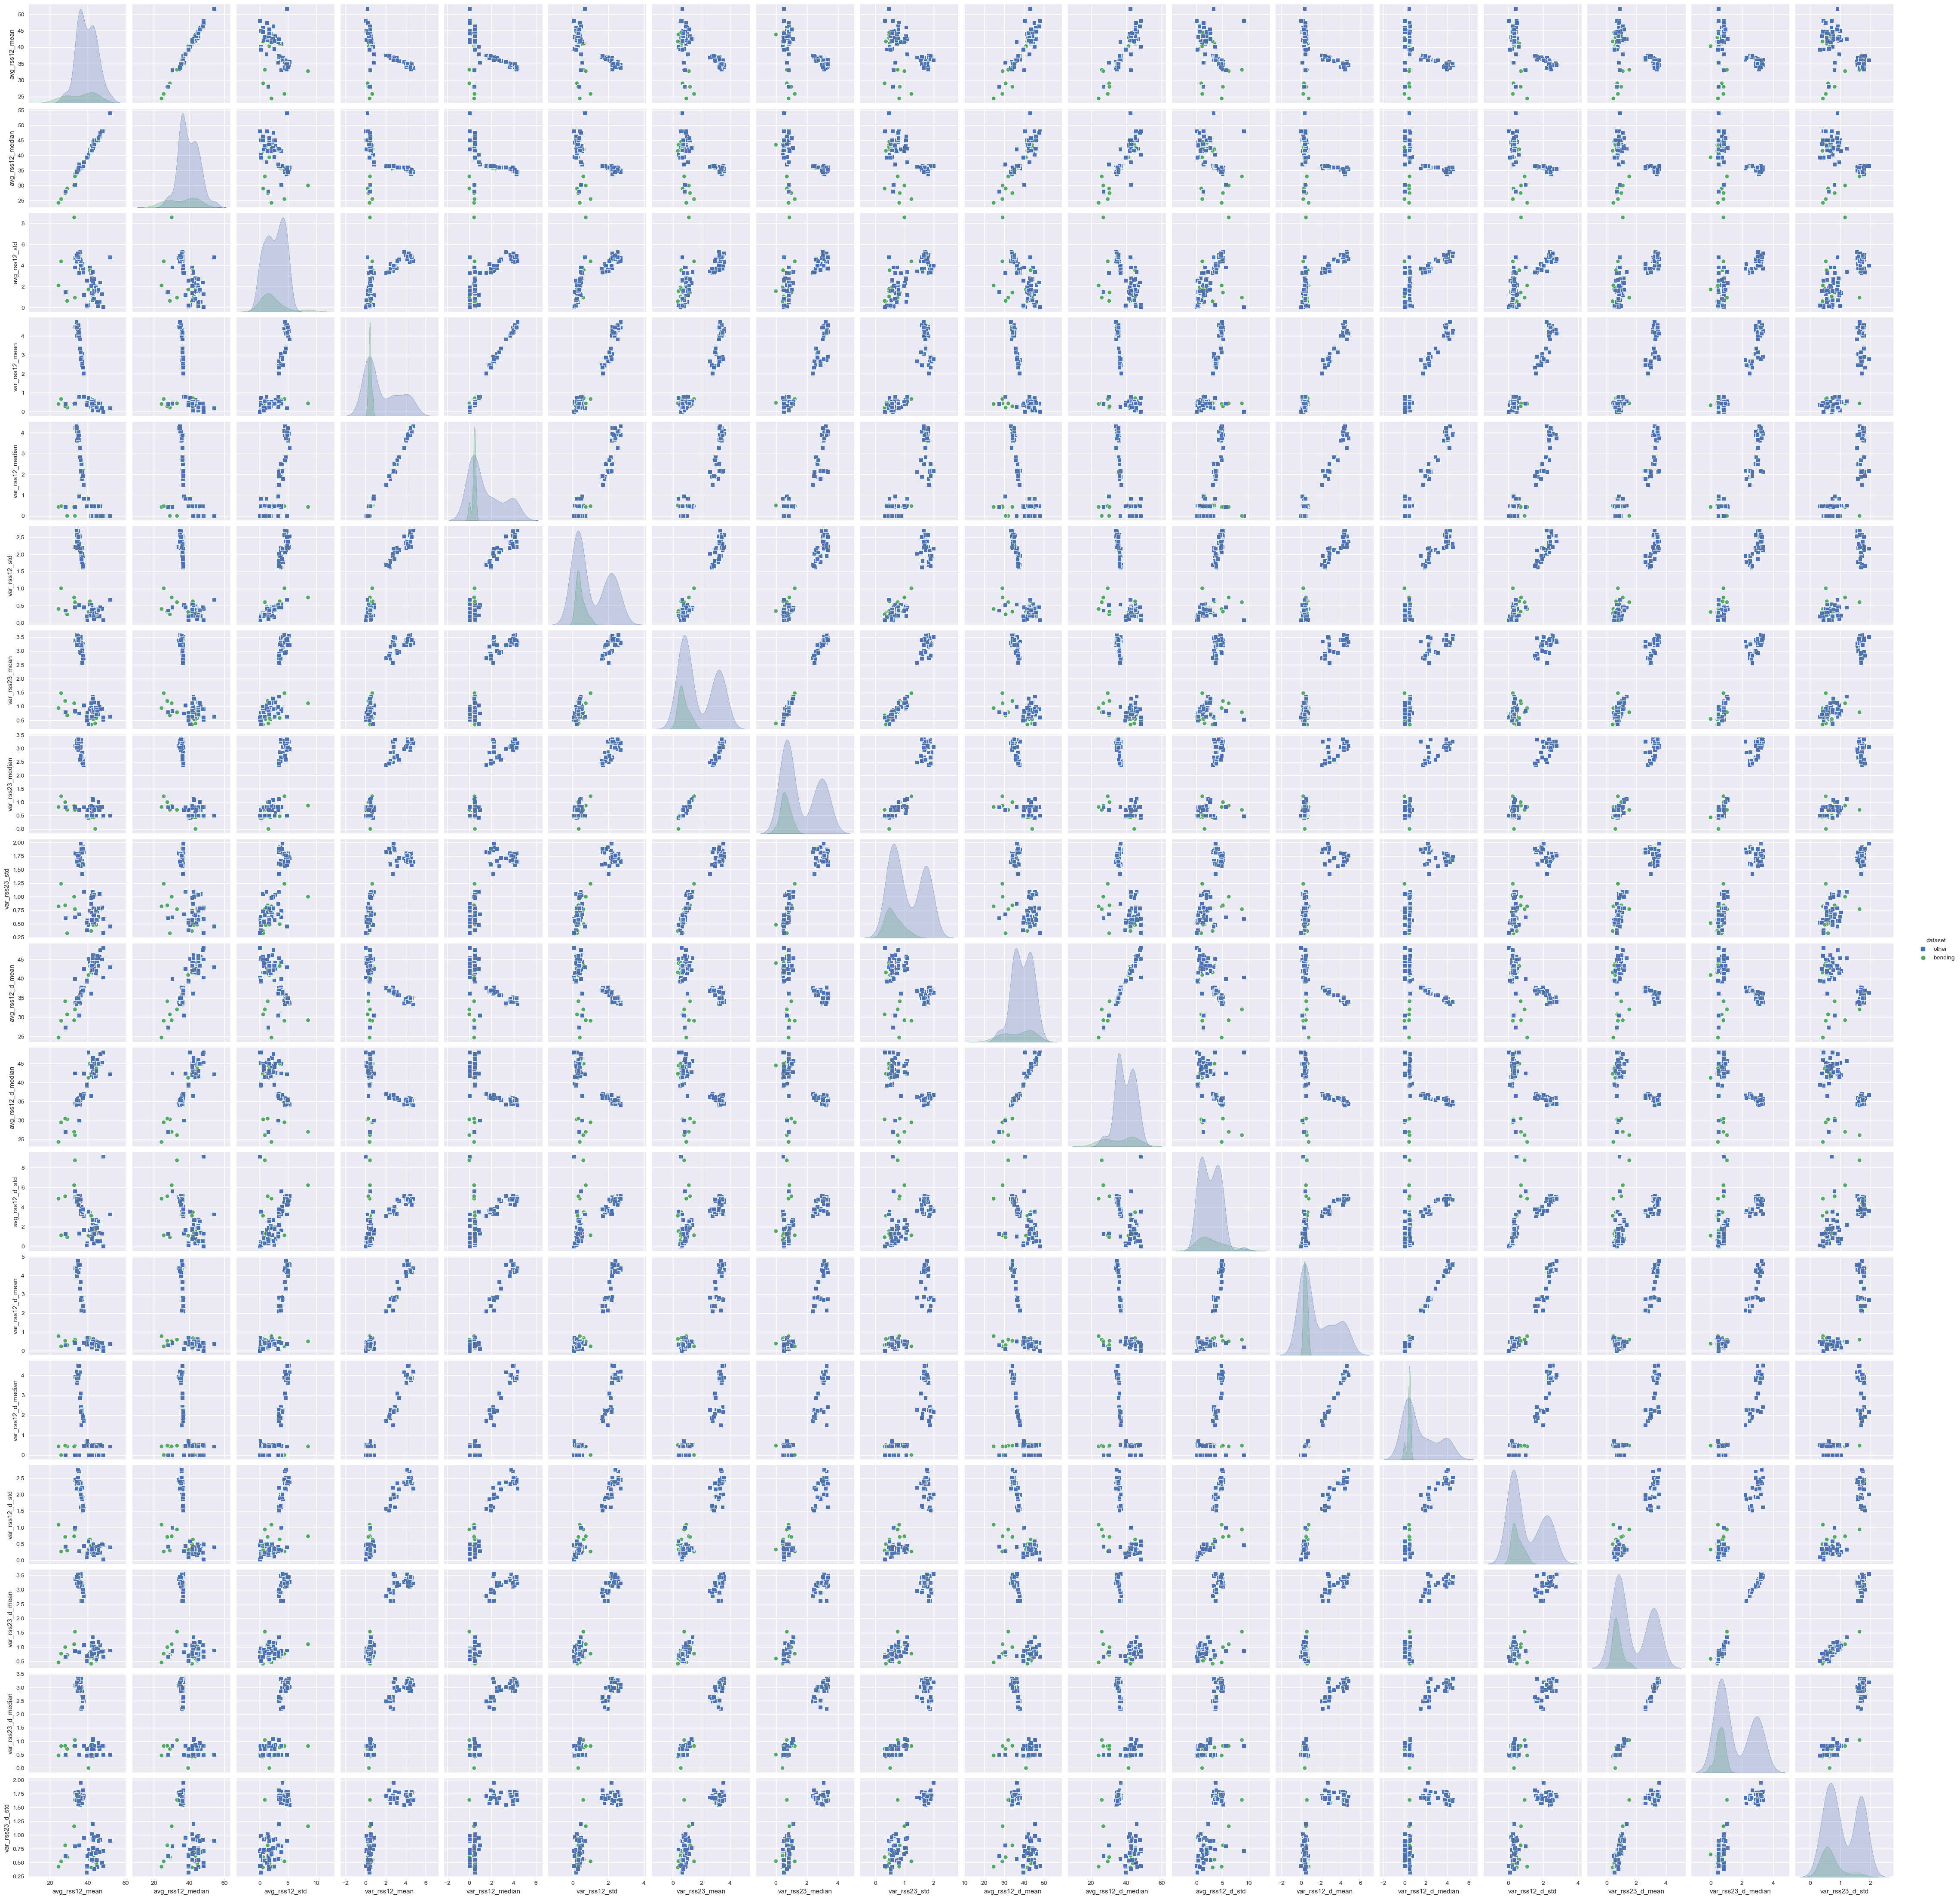

In [436]:
sns.pairplot(new_cols, hue = 'dataset',markers=["o", "s",], hue_order=['other','bending'])
plt.show()

There is not much difference in trends and patterns in the scatter plot with split and without split of dataset

In [29]:
gl = globals()
def split(dataset):
#     x = dataset.shape[0]
    df1 = dataset.iloc[241:,:]
    df1 = df1.reset_index(drop=True)
    df2 = dataset.iloc[:240,:]
    df2 = df2.reset_index(drop=True)
    df2 = df2.rename(columns={'avg_rss12': 'avg_rss12_d', 'var_rss12': 'var_rss12_d'
                             , 'avg_rss13': 'avg_rss13_d', 'avg_rss13': 'avg_rss13_d'
                             , 'avg_rss23': 'avg_rss23_d', 'var_rss23': 'var_rss23_d'})
    df1 = df1.drop(['dataset'],axis=1)
    df = pd.concat([df1,df2], axis=1)
    df = df.drop(['# Columns: time'],axis=1)
#     print(df1)
    return df
k=1
for i in train_list:
#     x = ['data' + i]
    gl['dataset%s' % k]=split(i)
    i=i+1
    k=k+1
    

In [30]:
df_list = []
for i in range(1,89):
    filename = gl['dataset%s' % i]
#     filename = f'dataset{i}'  
    df_list.append(filename)
concatenated_df = pd.concat(df_list, ignore_index=True)


In [31]:
newresult=concatenated_df.groupby('dataset',as_index = False).agg(['mean','median','std'])
newresult.columns = ['_'.join(col).strip() for col in newresult.columns.values]
new_cols = newresult.filter(regex='(var_rss12|avg_rss12|var_rss23)')
# filtered_cols = filtered_cols.filter(regex='(mean|median|std)')
new_cols['dataset'] = 'other' 
new_cols.loc[0:4, 'dataset'] = 'bending'
new_cols.loc[0:4, 'dataset'] = 'bending'
new_cols.loc[20:28, 'dataset'] = 'bending'

#### Only using feature 1,2,6

In [448]:
new_cols

avg_rss12_mean  avg_rss12_median  avg_rss12_std  var_rss12_mean  \
dataset                                                                    
1             40.305983             39.33       1.719499        0.338285   
2             42.986444             43.50       1.916208        0.391506   
3             24.451381             24.25       2.097658        0.407071   
4             25.840293             25.50       4.390237        0.671004   
5             37.423849             36.50       3.358621        2.337992   
...                 ...               ...            ...             ...   
84            41.561255             41.50       2.080901        0.541632   
85            43.340251             43.75       1.611954        0.335397   
86            41.913431             41.67       2.641678        0.444937   
87            44.287322             45.00       1.663832        0.230418   
88            45.471297             45.75       1.709975        0.449916   

         var_rss12_median  var_rss12_std  var_rss23_mean  var_rss23_median  \
dataset                                                                      
1                    0.43       0.313402        0.550544              0.43   
2                    0.47       0.316269        0.535816              0.43   
3                    0.43       0.401379        0.938745              0.82   
4                    0.47       1.007869        1.479414              1.22   
5                    1.92       1.660389        2.842469              2.45   
...                   ...            ...             ...               ...   
84                   0.50       0.354185        1.121255              0.87   
85                   0.47       0.283144        0.712050              0.71   
86                   0.47       0.389988        0.645732              0.50   
87                   0.00       0.310326        0.717448              0.50   
88                   0.47       0.364237        1.132050              1.00   

         var_rss23_std  avg_rss12_d_mean  avg_rss12_d_median  avg_rss12_d_std  \
dataset                                                                         
1             0.510945         40.946958              41.250         1.102963   
2             0.575225         42.643292              42.500         0.641849   
3             0.820061         24.675375              24.330         4.856867   
4             1.237581         29.071583              29.500         1.133954   
5             1.893499         36.954208              36.000         3.772836   
...                ...               ...                 ...              ...   
84            0.979361         43.472208              44.500         1.875658   
85            0.525280         42.584042              42.500         1.279371   
86            0.572124         43.437458              44.125         1.809284   
87            0.578985         42.084750              43.125         2.690071   
88            0.790112         43.413042              45.000         2.584612   

         var_rss12_d_mean  var_rss12_d_median  var_rss12_d_std  \
dataset                                                          
1                0.375667                0.47         0.328089   
2                0.355000                0.47         0.258298   
3                0.774500                0.43         1.085015   
4                0.231208                0.00         0.265205   
5                2.392667                1.92         1.523329   
...                   ...                 ...              ...   
84               0.340042                0.43         0.315319   
85               0.371750                0.47         0.340681   
86               0.393167                0.47         0.345189   
87               0.313083                0.43         0.342124   
88               0.245167                0.00         0.321565   

         var_rss23_d_mean  var_rss23_d_median  var_rss23_d_std  dataset  
dataset           

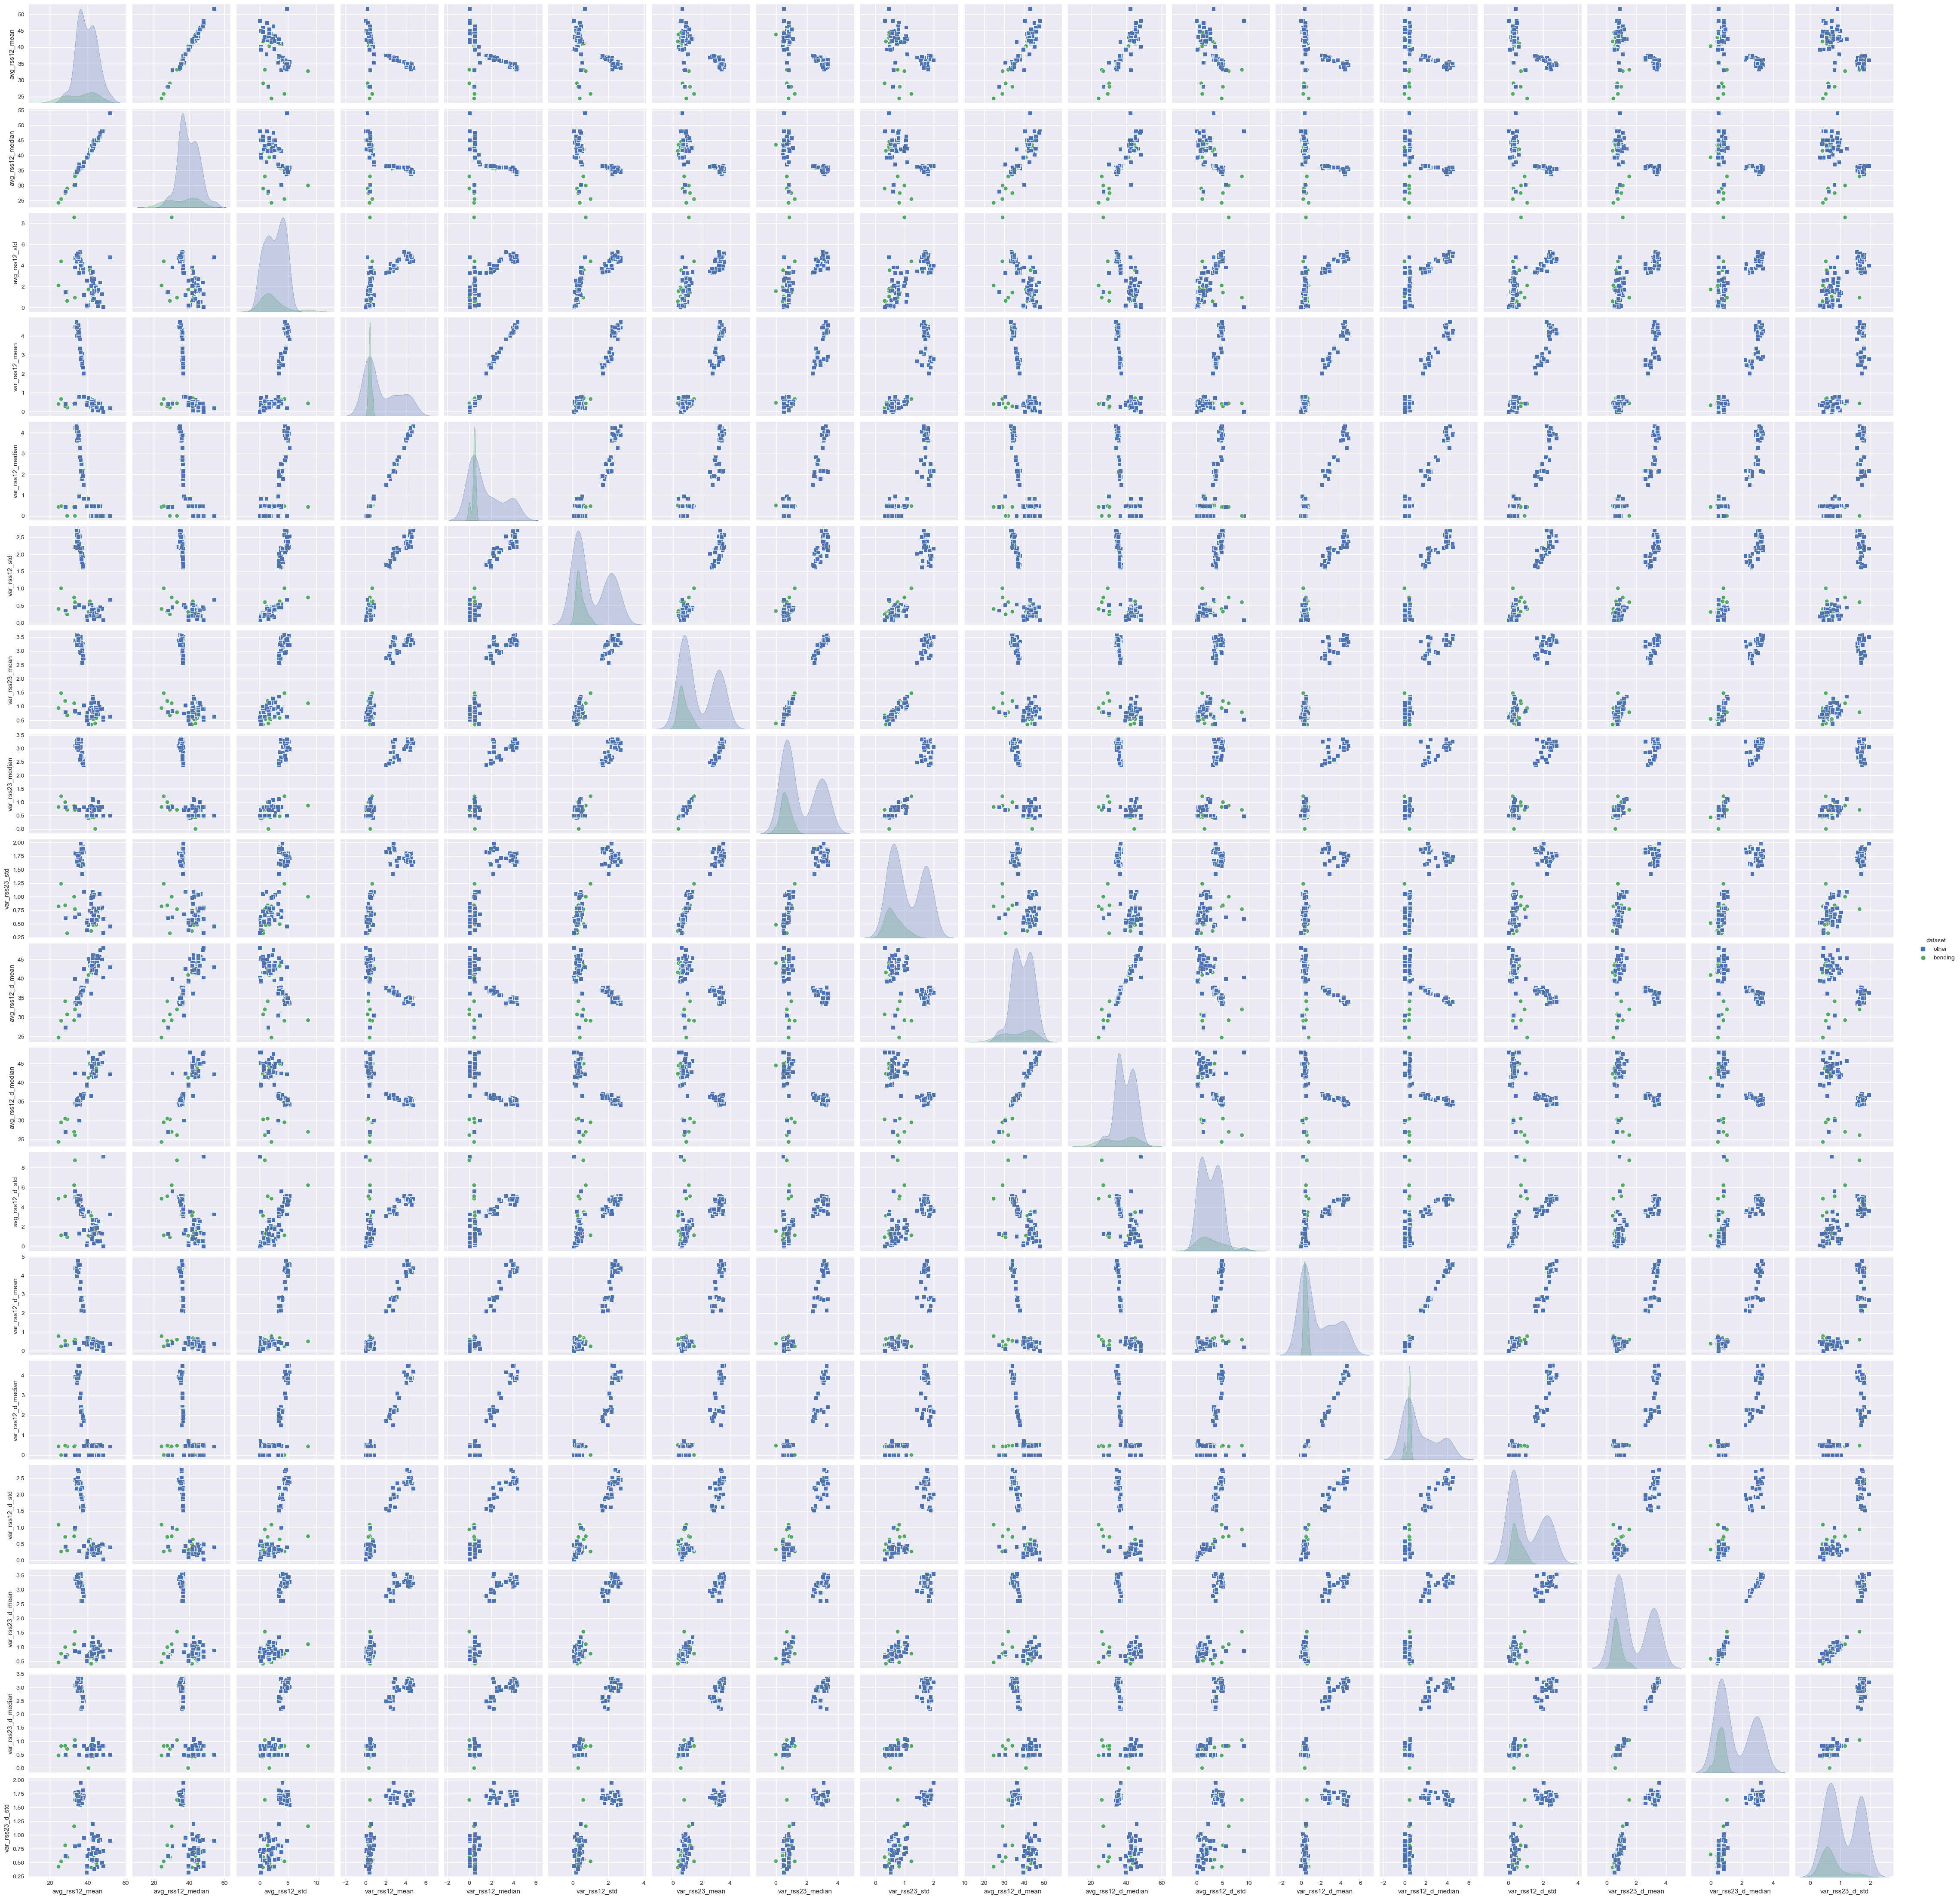

In [441]:
sns.pairplot(new_cols, hue = 'dataset',markers=["o", "s",], hue_order=['other','bending'])
plt.show()

### 2.a.iii
Making l in range(1,21) partitions for train set

In [32]:

pd.set_option('display.max_columns', None)

def concatenate_partitions_horizontally(data, n):
    partitions = np.array_split(data, n)
    for i in range(n):
        partitions[i] = partitions[i].reset_index(drop=True)
    concatenated_partitions = pd.concat(partitions, axis=1)
    return concatenated_partitions
# data = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10], 'C': [11, 12, 13, 14, 15]})
# concatenated_partitions = concatenate_partitions_horizontally(bend12, 6)
# print(concatenated_partitions)


In [33]:
def data_n(num):
    gl = globals()
    ls = []
    for i, x in enumerate(train_list):
        concatenated_partitions = concatenate_partitions_horizontally(x, num)
        gl['con%s'%i] = concatenated_partitions
        ls.append(gl['con%s'%i])

In [37]:
gl=globals()
def split_num(i):
    x = data_n(i)
    a=[]
    for x in range(len(train_list)):
        a.append(gl['con%s'%x])
#         print(a)
    gl['l_train%s'%i]=pd.concat(a)
    gl['l_train%s'%i]=gl['l_train%s'%i].reset_index(drop=True)
#     gl['l%s'%i]=gl['l%s'%i].rename(columns={"dataset": "instance"})
#     gl['l%s'%i].rename(columns={gl['l%s'%i].columns[-1]: 'instance'},inplace=True)
    gl['l_train%s'%i]=gl['l_train%s'%i].drop(['# Columns: time'],axis=1)
    gl['l_train%s'%i]=gl['l_train%s'%i].T.drop_duplicates().T
    gl['l_train%s'%i].columns = pd.io.parsers.base_parser.ParserBase({'usecols': None})._maybe_dedup_names(gl['l_train%s'%i].columns)
    gl['l_train%s'%i] = gl['l_train%s'%i][gl['l_train%s'%i].columns.drop(list(gl['l_train%s'%i].filter(regex='dataset.')))]


#     print(x)
for i in range(1,22):
    split_num(i)

In [38]:
#Appending all partitions for each into a list

Ls=[l_train1,l_train2,l_train3,l_train4,l_train5,l_train6,l_train7,l_train8,l_train9,l_train10,l_train11,l_train12,
   l_train13,l_train14,l_train15,l_train16,l_train17,l_train18,l_train19,l_train20,l_train21]
# Ls=[l_train1,l_train2,l_train3]
for i in range(len(Ls)):
    Ls[i]=Ls[i].groupby('dataset',as_index='False').agg(['mean','median','std'])
    Ls[i].reset_index(inplace=True)
    Ls[i] = Ls[i].rename(columns = {'index':'new column name'})
    Ls[i]['dataset']=0
    Ls[i].loc[20:28, 'dataset'] = 1

In [455]:
# Finding best (l,p) pair using RFECV

i=0
for X in Ls:


    min_features_to_select = 1  # Minimum number of features to consider
    clf = LogisticRegression(penalty='none' ,max_iter=1000)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
        n_jobs=2
    )
    rfecv.fit(X.iloc[:,1:], X.iloc[:,0])
    score = rfecv.cv_results_['mean_test_score'].max()
#     rfecv.score(X.iloc[:,1:], X.iloc[:,0]) #test
    
    print(f"(l,p): ({i},{rfecv.n_features_}),  (score = {score})")
    print('--------------------------------------------')
    i+=1

(l,p): (0,3),  (score = 0.8989010989010989)
---------------------------------------------------------------
(l,p): (1,3),  (score = 0.8857142857142858)
---------------------------------------------------------------
(l,p): (2,4),  (score = 0.8703296703296705)
---------------------------------------------------------------
(l,p): (3,1),  (score = 0.8703296703296702)
---------------------------------------------------------------
(l,p): (4,6),  (score = 0.8857142857142858)
---------------------------------------------------------------
(l,p): (5,10),  (score = 0.8714285714285716)
---------------------------------------------------------------
(l,p): (6,1),  (score = 0.856043956043956)
---------------------------------------------------------------
(l,p): (7,1),  (score = 0.856043956043956)
---------------------------------------------------------------
(l,p): (8,1),  (score = 0.8703296703296702)
---------------------------------------------------------------
(l,p): (9,1),  (score = 0.870

Best (l,p) pair is (20,3) where mean test score is 0.8989.

In [44]:
# Function that appends in the list opt_f the optimal features as chosen by RFECV above

def extract(features, fs):
    opt_f = []
    for i, feature in enumerate(features):
#         print(i)
        if fs.support_[i]:
            opt_f.append(feature)
    return opt_f


In [43]:
# Function that returns the optimal features as chosen by RFECV above


def get_feat(i):


    min_features_to_select = 1  # Minimum number of features to consider
    clf = LogisticRegression(penalty='none' ,max_iter=1000)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
        n_jobs=2
    )
    rfecv.fit(Ls[i].iloc[:,1:], Ls[i].iloc[:,0])
    optimal_feat = extract(Ls[i].iloc[:,1:], rfecv)
    i+=1
    return optimal_feat


### 2.a.iv

Reporting p-values for optimal features (p) for all splits L and ther parameters Betas

In [460]:
# i=1
for i in range(0,20):  
    logit_model = sm.Logit(Ls[i].iloc[:,0], Ls[i].loc[:,get_feat(i)])
    result=logit_model.fit(method = 'lbfgs',maxiter = 10)
    print('------------------------------------')
    print(f'************ For L={i} ***************')
    print('------------------------------------')
    print(result.summary())
    i+=1

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.34420D+00

At iterate    1    f=  3.95031D-01    |proj g|=  2.42887D-01

At iterate    2    f=  3.61585D-01    |proj g|=  1.93378D-01

At iterate    3    f=  3.29932D-01    |proj g|=  2.87881D-02

At iterate    4    f=  3.29229D-01    |proj g|=  1.74763D-02

At iterate    5    f=  3.28790D-01    |proj g|=  1.40379D-02

At iterate    6    f=  3.27647D-01    |proj g|=  3.91669D-03

At iterate    7    f=  3.27556D-01    |proj g|=  2.21977D-03

At iterate    8    f=  3.27431D-01    |proj g|=  4.40497D-03

At iterate    9    f=  3.27272D-01    |proj g|=  6.56289D-03

At iterate   10    f=  3.26943D-01    |proj g|=  8.52337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.35025D-01

At iterate    1    f=  3.80193D-01    |proj g|=  1.83064D-02

At iterate    2    f=  3.71500D-01    |proj g|=  1.75010D-02

At iterate    3    f=  3.47068D-01    |proj g|=  2.56926D-02

At iterate    4    f=  3.39339D-01    |proj g|=  1.63038D-02

At iterate    5    f=  3.37195D-01    |proj g|=  2.85178D-03

At iterate    6    f=  3.36894D-01    |proj g|=  4.12783D-03

At iterate    7    f=  3.36212D-01    |proj g|=  7.64010D-03

At iterate    8    f=  3.35774D-01    |proj g|=  8.32049D-03

At iterate    9    f=  3.32735D-01    |proj g|=  9.26361D-03

At iterate   10    f=  3.30318D-01    |proj g|=  6.18223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

------------------------------------
************ For L=3 ***************
------------------------------------
Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.49448D-01

At iterate    1    f=  4.00067D-01    |proj g|=  7.47833D-02

At iterate    2    f=  3.91958D-01    |proj g|=  5.08541D-02

At iterate    3    f=  3.83184D-01    |proj g|=  1.53553D-02

At iterate    4    f=  3.82033D-01    |proj g|=  4.20167D-03

At iterate    5    f=  3.81929D-01    |proj g|=  4.54535D-04

At iterate    6    f=  3.81928D-01    |proj g|=  1.48029D-05

At iterate    7    f=  3.81928D-01    |proj g|=  5.36216D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of activ

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.94930D+00

At iterate    1    f=  3.86435D-01    |proj g|=  8.62067D-01

At iterate    2    f=  3.49751D-01    |proj g|=  7.64034D-01

At iterate    3    f=  2.98946D-01    |proj g|=  3.40052D-01

At iterate    4    f=  2.92155D-01    |proj g|=  4.63999D-02

At iterate    5    f=  2.91939D-01    |proj g|=  4.05660D-02

At iterate    6    f=  2.90296D-01    |proj g|=  1.10184D-01

At iterate    7    f=  2.88659D-01    |proj g|=  1.26643D-01

At iterate    8    f=  2.87535D-01    |proj g|=  4.53499D-02

------------------------------------
************ For L=4 ***************
------------------------------------
At iterate    9    f=  2.87383D-01    |proj g|=  8.50444D-03

At iterate   10    f=  2.87360D-01    |proj g|=  1.23084D-02

           * * *

Tit   = total number 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.11431D+00

At iterate    1    f=  3.16580D-01    |proj g|=  3.44061D-02

At iterate    2    f=  3.15709D-01    |proj g|=  2.36802D-02

At iterate    3    f=  3.14995D-01    |proj g|=  2.77691D-03

At iterate    4    f=  3.14987D-01    |proj g|=  1.92417D-04
------------------------------------
************ For L=6 ***************
------------------------------------

At iterate    5    f=  3.14987D-01    |proj g|=  1.43157D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

      

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *
------------------------------------
************ For L=8 ***************
------------------------------------

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.16753D+00

At iterate    1    f=  3.58995D-01    |proj g|=  1.07485D-01

At iterate    2    f=  3.51229D-01    |proj g|=  7.56561D-02

At iterate    3    f=  3.46067D-01    |proj g|=  3.31711D-02

At iterate    4    f=  3.45265D-01    |proj g|=  5.92580D-03

At iterate    5    f=  3.45236D-01    |proj g|=  3.75409D-04

At iterate    6    f=  3.45236D-01    |proj g|=  4.64569D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.99420D+00

At iterate    1    f=  3.92028D-01    |proj g|=  9.24241D-01
------------------------------------
************ For L=10 ***************
------------------------------------

At iterate    2    f=  3.55234D-01    |proj g|=  8.07029D-01

At iterate    3    f=  3.06737D-01    |proj g|=  3.07754D-01

At iterate    4    f=  3.02493D-01    |proj g|=  9.14583D-03

At iterate    5    f=  3.02490D-01    |proj g|=  1.61672D-03

At iterate    6    f=  3.02490D-01    |proj g|=  6.78543D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of th

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.44396D+01

At iterate    1    f=  4.26031D-01    |proj g|=  3.72747D+00

At iterate    2    f=  3.85420D-01    |proj g|=  2.67141D+00

At iterate    3    f=  3.69537D-01    |proj g|=  2.44884D+00

At iterate    4    f=  3.52867D-01    |proj g|=  6.43684D-01

At iterate    5    f=  3.29468D-01    |proj g|=  8.80614D-01

At iterate    6    f=  2.76718D-01    |proj g|=  2.79682D+00

At iterate    7    f=  2.50127D-01    |proj g|=  1.74167D+00

At iterate    8    f=  2.28840D-01    |proj g|=  6.38559D-01

At iterate    9    f=  2.23235D-01    |proj g|=  2.67857D-01

At iterate   10    f=  2.21481D-01    |proj g|=  1.27152D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *
------------------------------------
************ For L=12 ***************
------------------------------------

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.05973D+00

At iterate    1    f=  3.24411D-01    |proj g|=  4.13095D-03

At iterate    2    f=  3.24397D-01    |proj g|=  2.91022D-03

At iterate    3    f=  3.24384D-01    |proj g|=  4.16164D-05

At iterate    4    f=  3.24384D-01    |proj g|=  4.11829D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

------------------------------------
************ For L=13 ***************
------------------------------------
Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  5.75435D-01

At iterate    1    f=  4.28229D-01    |proj g|=  7.29950D-02

At iterate    2    f=  4.19404D-01    |proj g|=  4.96048D-02

At iterate    3    f=  4.09648D-01    |proj g|=  1.66629D-02

At iterate    4    f=  4.07968D-01    |proj g|=  5.31835D-03

At iterate    5    f=  4.07748D-01    |proj g|=  7.88856D-04

At iterate    6    f=  4.07743D-01    |proj g|=  4.25684D-05

At iterate    7    f=  4.07743D-01    |proj g|=  3.56451D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of acti

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.02610D+00

At iterate    1    f=  3.71452D-01    |proj g|=  8.09522D-01

At iterate    2    f=  3.39683D-01    |proj g|=  7.16463D-01

------------------------------------
************ For L=14 ***************
------------------------------------
At iterate    3    f=  2.91064D-01    |proj g|=  2.72538D-01

At iterate    4    f=  2.85560D-01    |proj g|=  9.22080D-02

At iterate    5    f=  2.84467D-01    |proj g|=  7.52941D-02

At iterate    6    f=  2.81180D-01    |proj g|=  2.01680D-01

At iterate    7    f=  2.73965D-01    |proj g|=  3.62765D-01

At iterate    8    f=  2.65397D-01    |proj g|=  3.63196D-01

At iterate    9    f=  2.57769D-01    |proj g|=  9.59610D-02

At iterate   10    f=  2.57030D-01    |proj g|=  2.47910D-02

           * * *

Tit   = total number

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          108     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.44592D+01

At iterate    1    f=  3.98968D-01    |proj g|=  3.40310D+00

At iterate    2    f=  3.70237D-01    |proj g|=  2.42964D+00

At iterate    3    f=  3.51019D-01    |proj g|=  1.37657D+00

At iterate    4    f=  3.40829D-01    |proj g|=  7.33898D-01

At iterate    5    f=  3.29798D-01    |proj g|=  7.39884D-01

At iterate    6    f=  2.60160D-01    |proj g|=  1.42157D+00

At iterate    7    f=  2.18536D-01    |proj g|=  2.32800D-01

At iterate    8    f=  2.14272D-01    |proj g|=  2.45864D-01

At iterate    9    f=  2.13158D-01    |proj g|=  2.81983D-01

At iterate   10    f=  2.08389D-01    |proj g|=  9.35387D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.02657D+00

At iterate    1    f=  3.63107D-01    |proj g|=  7.95171D-01

At iterate    2    f=  3.34440D-01    |proj g|=  7.05247D-01
------------------------------------
************ For L=17 ***************
------------------------------------

At iterate    3    f=  2.90323D-01    |proj g|=  2.69476D-01

At iterate    4    f=  2.86515D-01    |proj g|=  8.92406D-03

At iterate    5    f=  2.86511D-01    |proj g|=  1.62534D-03

At iterate    6    f=  2.86511D-01    |proj g|=  7.80469D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of th

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.07916D+00

At iterate    1    f=  5.76018D-01    |proj g|=  1.09326D+00

At iterate    2    f=  3.13020D-01    |proj g|=  8.04965D-01

At iterate    3    f=  2.99786D-01    |proj g|=  9.17309D-02

At iterate    4    f=  2.99338D-01    |proj g|=  8.69212D-02

At iterate    5    f=  2.95816D-01    |proj g|=  2.59300D-01

At iterate    6    f=  2.92462D-01    |proj g|=  3.10478D-01

At iterate    7    f=  2.85131D-01    |proj g|=  2.69365D-01

At iterate    8    f=  2.76944D-01    |proj g|=  1.48054D-01

At iterate    9    f=  2.70194D-01    |proj g|=  4.55445D-02

At iterate   10    f=  2.68517D-01    |proj g|=  8.38230D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.18267D-01

At iterate    1    f=  4.12971D-01    |proj g|=  2.08890D-02

At iterate    2    f=  4.12449D-01    |proj g|=  1.83463D-02

At iterate    3    f=  4.08848D-01    |proj g|=  1.83791D-02

At iterate    4    f=  4.06090D-01    |proj g|=  2.47263D-02

------------------------------------
************ For L=19 ***************
------------------------------------
At iterate    5    f=  3.97876D-01    |proj g|=  3.44466D-02

At iterate    6    f=  3.83737D-01    |proj g|=  4.02025D-02

At iterate    7    f=  3.59521D-01    |proj g|=  3.54252D-02

At iterate    8    f=  3.45050D-01    |proj g|=  1.00813D-02

At iterate    9    f=  3.43535D-01    |proj g|=  1.23113D-02

At iterate   10    f=  3.42910D-01    |proj g|=  1.95066D-03

           * * *

Tit   = total number

 This problem is unconstrained.


Confusion Matrix for L0 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L0 with optimal features: 0.5
AUC Score for L0 with optimal features: 0.8212962962962963


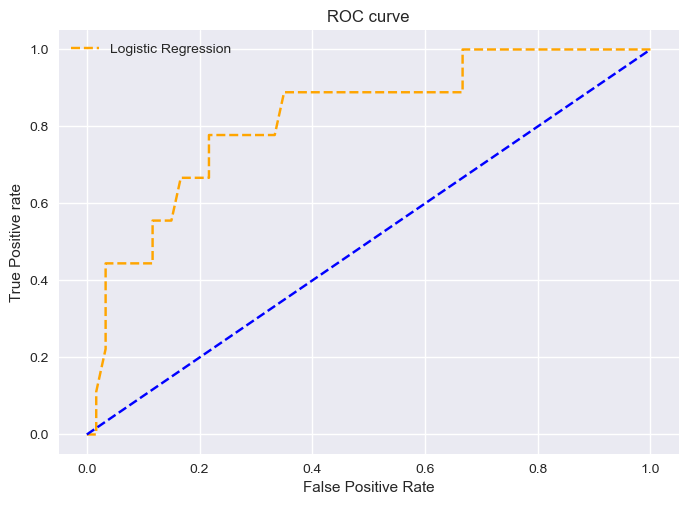

----------------------------------------------------------------
 
Confusion Matrix for L1 with optimal features
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.11      0.20         9

    accuracy                           0.88        69
   macro avg       0.94      0.56      0.57        69
weighted avg       0.90      0.88      0.84        69

ROC Score for L1 with optimal features: 0.5555555555555556
AUC Score for L1 with optimal features: 0.7944444444444444


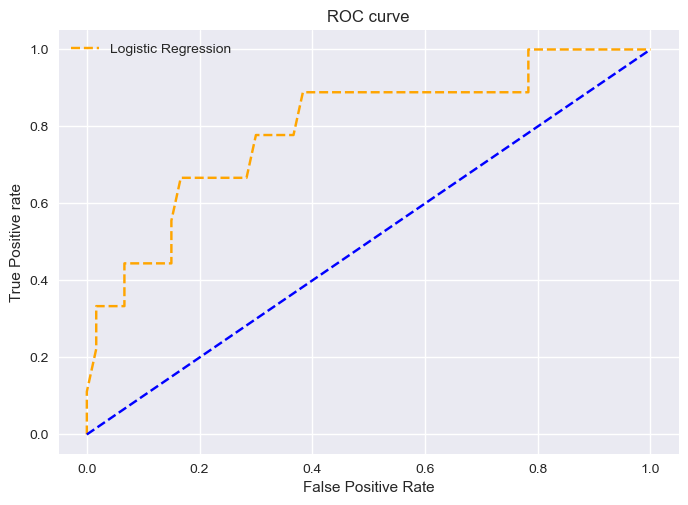

----------------------------------------------------------------
 
Confusion Matrix for L2 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L2 with optimal features: 0.5
AUC Score for L2 with optimal features: 0.762962962962963


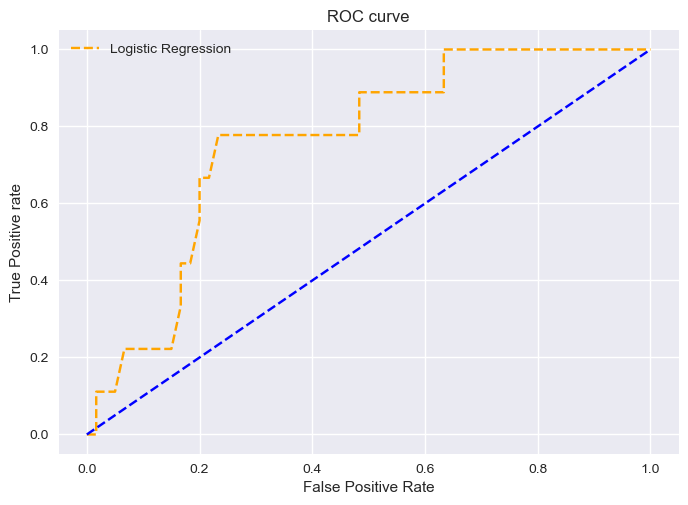

----------------------------------------------------------------
 
Confusion Matrix for L3 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L3 with optimal features: 0.5
AUC Score for L3 with optimal features: 0.7212962962962962


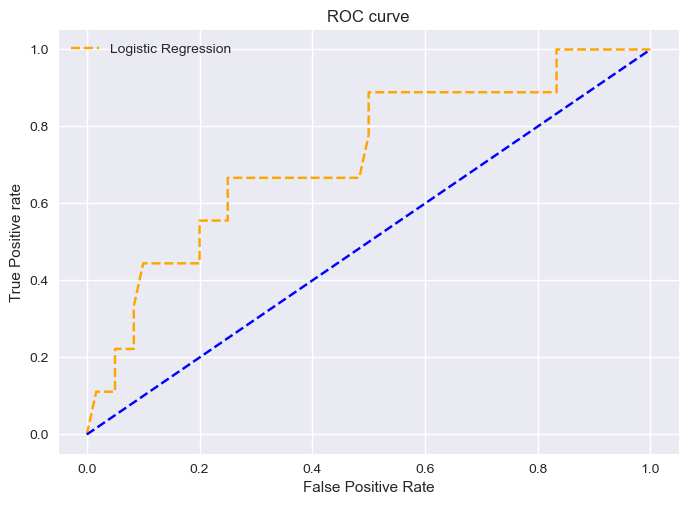

----------------------------------------------------------------
 
Confusion Matrix for L4 with optimal features
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        60
           1       0.75      0.33      0.46         9

    accuracy                           0.90        69
   macro avg       0.83      0.66      0.70        69
weighted avg       0.89      0.90      0.88        69

ROC Score for L4 with optimal features: 0.6583333333333332
AUC Score for L4 with optimal features: 0.937962962962963


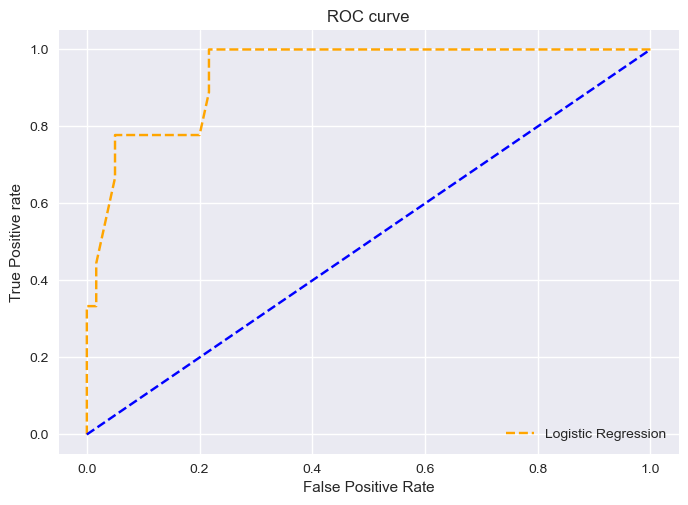

----------------------------------------------------------------
 
Confusion Matrix for L5 with optimal features
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.71      0.56      0.63         9

    accuracy                           0.91        69
   macro avg       0.82      0.76      0.79        69
weighted avg       0.91      0.91      0.91        69

ROC Score for L5 with optimal features: 0.7611111111111112
AUC Score for L5 with optimal features: 0.9472222222222222


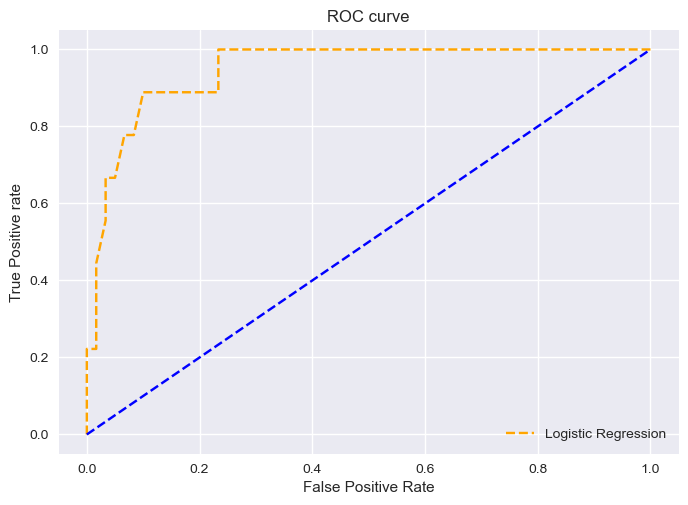

----------------------------------------------------------------
 
Confusion Matrix for L6 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L6 with optimal features: 0.5
AUC Score for L6 with optimal features: 0.8296296296296296


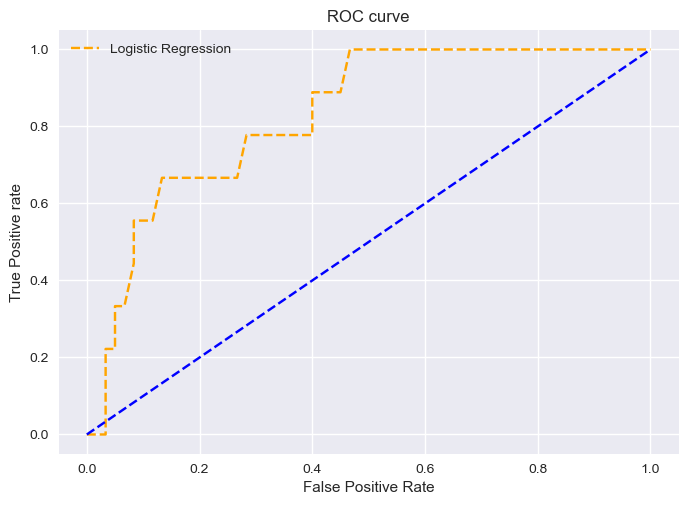

----------------------------------------------------------------
 
Confusion Matrix for L7 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L7 with optimal features: 0.5
AUC Score for L7 with optimal features: 0.7314814814814815


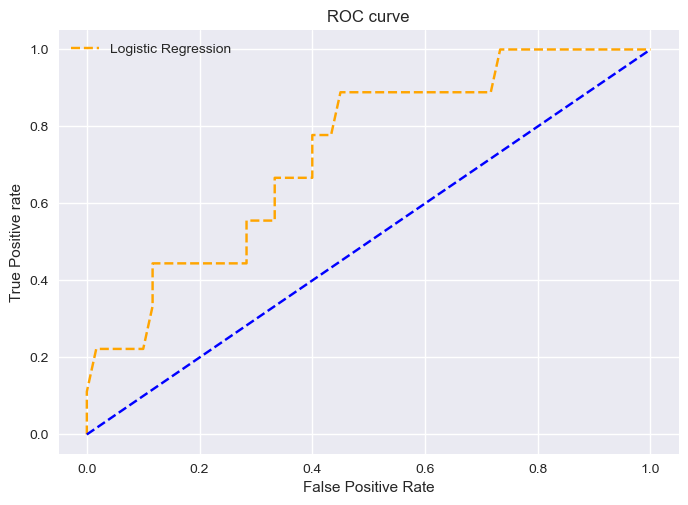

----------------------------------------------------------------
 
Confusion Matrix for L8 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L8 with optimal features: 0.5
AUC Score for L8 with optimal features: 0.7611111111111111


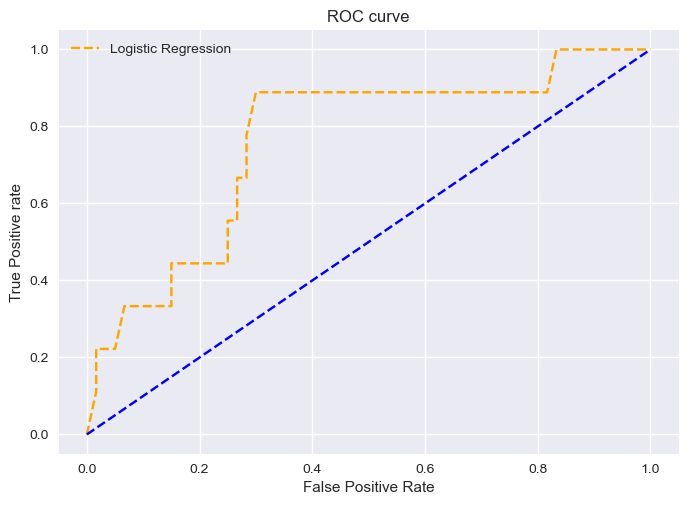

----------------------------------------------------------------
 
Confusion Matrix for L9 with optimal features
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.11      0.20         9

    accuracy                           0.88        69
   macro avg       0.94      0.56      0.57        69
weighted avg       0.90      0.88      0.84        69

ROC Score for L9 with optimal features: 0.5555555555555556
AUC Score for L9 with optimal features: 0.7925925925925926


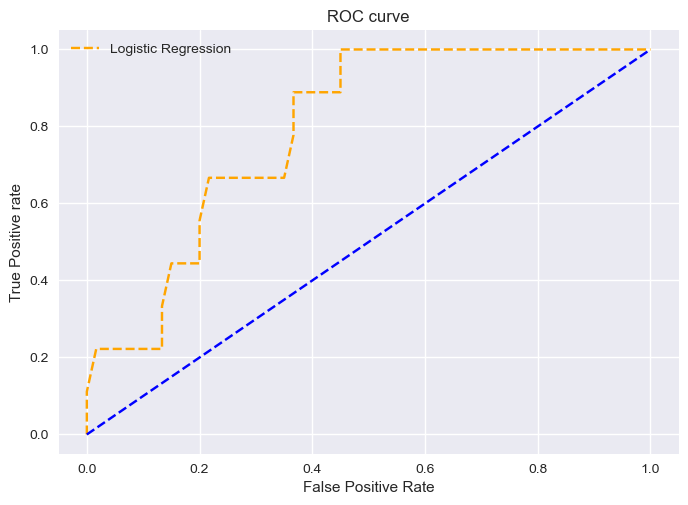

----------------------------------------------------------------
 
Confusion Matrix for L10 with optimal features
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.60      0.33      0.43         9

    accuracy                           0.88        69
   macro avg       0.75      0.65      0.68        69
weighted avg       0.87      0.88      0.87        69

ROC Score for L10 with optimal features: 0.6499999999999999
AUC Score for L10 with optimal features: 0.8722222222222221


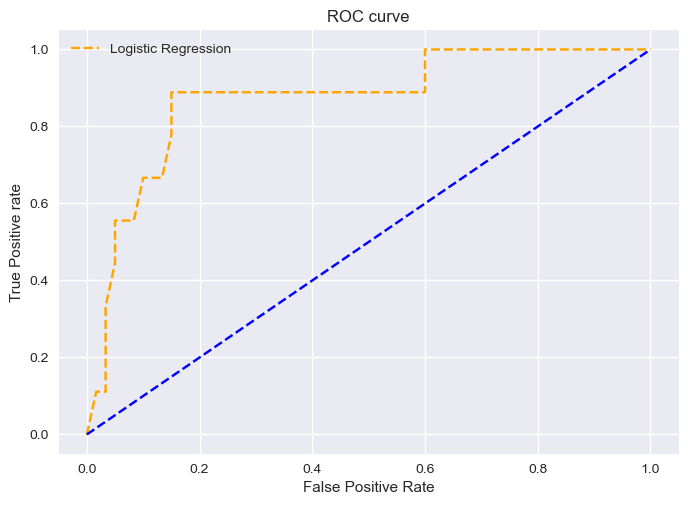

----------------------------------------------------------------
 
Confusion Matrix for L11 with optimal features
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.86      0.67      0.75         9

    accuracy                           0.94        69
   macro avg       0.90      0.82      0.86        69
weighted avg       0.94      0.94      0.94        69

ROC Score for L11 with optimal features: 0.8249999999999998
AUC Score for L11 with optimal features: 0.9842592592592593


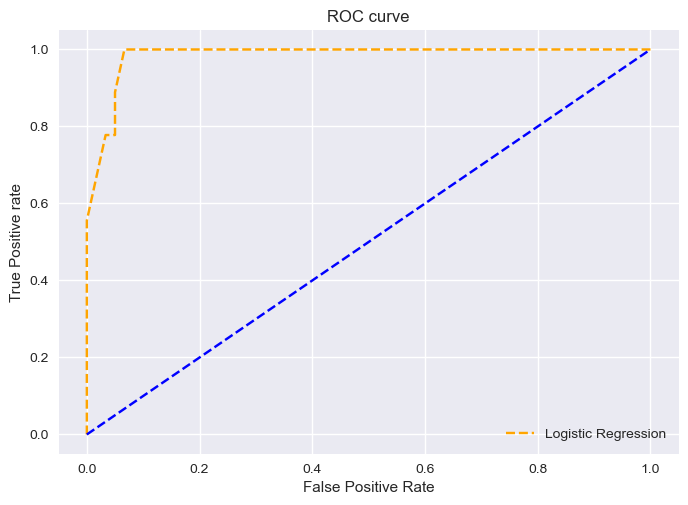

----------------------------------------------------------------
 
Confusion Matrix for L12 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L12 with optimal features: 0.5
AUC Score for L12 with optimal features: 0.7981481481481482


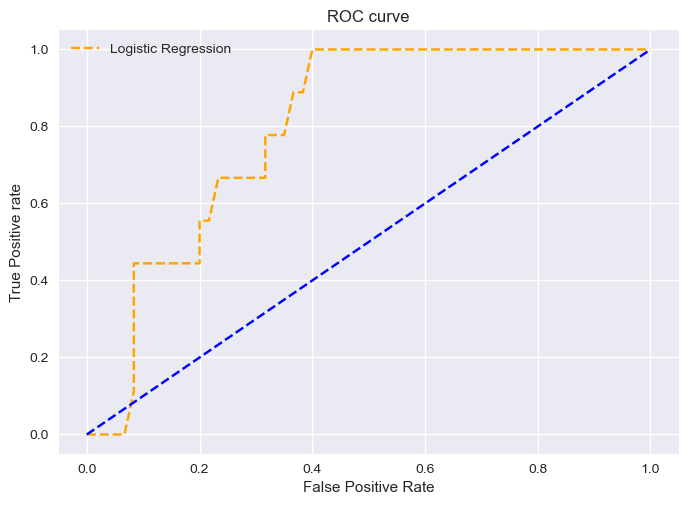

----------------------------------------------------------------
 
Confusion Matrix for L13 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L13 with optimal features: 0.5
AUC Score for L13 with optimal features: 0.6648148148148147


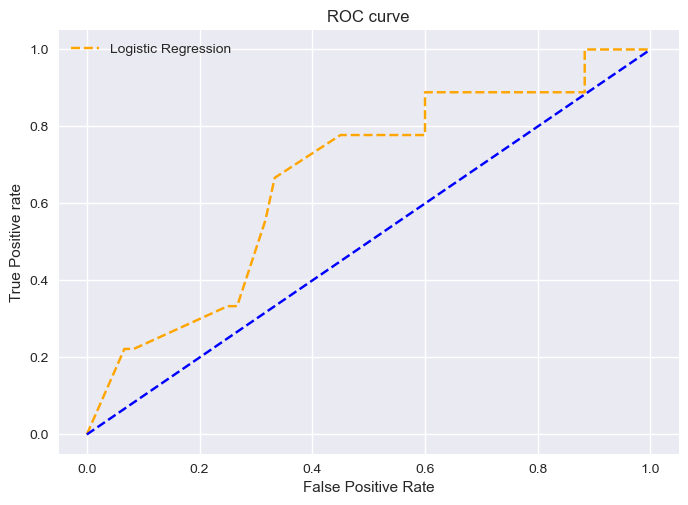

----------------------------------------------------------------
 
Confusion Matrix for L14 with optimal features
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.50      0.33      0.40         9

    accuracy                           0.87        69
   macro avg       0.70      0.64      0.66        69
weighted avg       0.85      0.87      0.86        69

ROC Score for L14 with optimal features: 0.6416666666666666
AUC Score for L14 with optimal features: 0.924074074074074


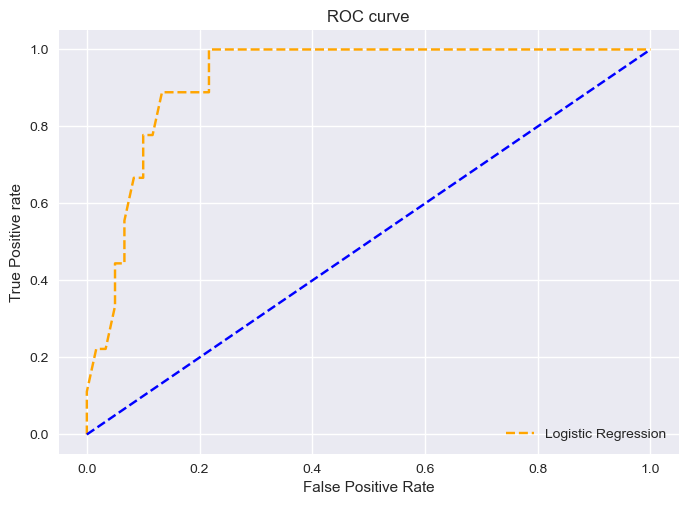

----------------------------------------------------------------
 
Confusion Matrix for L15 with optimal features
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.67      0.44      0.53         9

    accuracy                           0.90        69
   macro avg       0.79      0.71      0.74        69
weighted avg       0.89      0.90      0.89        69

ROC Score for L15 with optimal features: 0.7055555555555556
AUC Score for L15 with optimal features: 0.8824074074074073


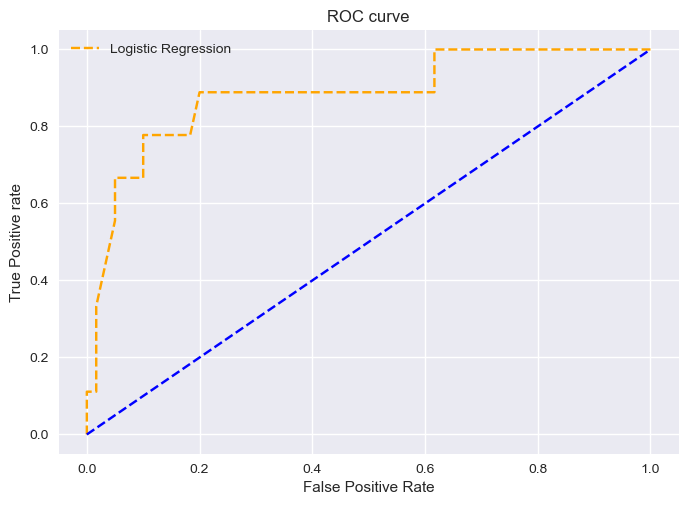

----------------------------------------------------------------
 
Confusion Matrix for L16 with optimal features
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.86      0.67      0.75         9

    accuracy                           0.94        69
   macro avg       0.90      0.82      0.86        69
weighted avg       0.94      0.94      0.94        69

ROC Score for L16 with optimal features: 0.8249999999999998
AUC Score for L16 with optimal features: 0.9861111111111112


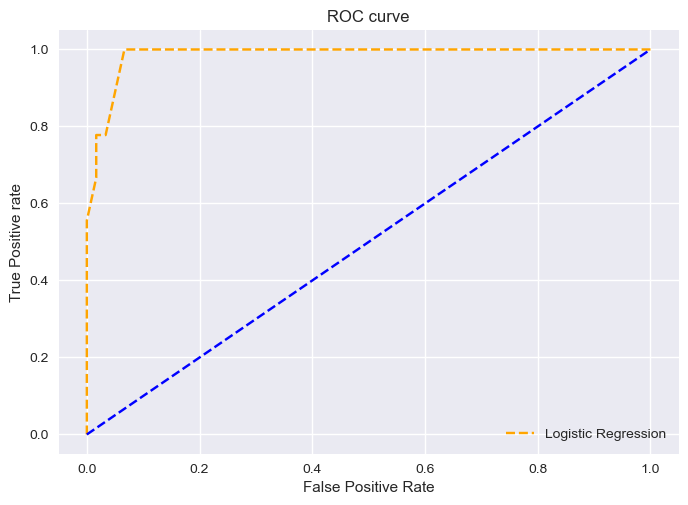

----------------------------------------------------------------
 
Confusion Matrix for L17 with optimal features
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.71      0.56      0.63         9

    accuracy                           0.91        69
   macro avg       0.82      0.76      0.79        69
weighted avg       0.91      0.91      0.91        69

ROC Score for L17 with optimal features: 0.7611111111111112
AUC Score for L17 with optimal features: 0.8962962962962963


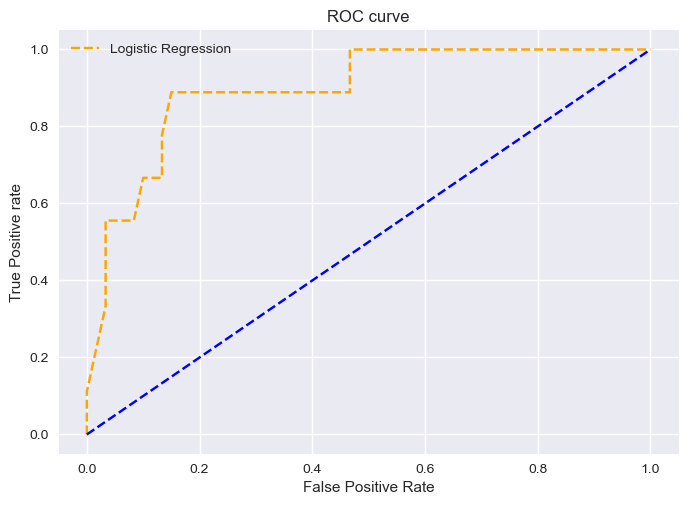

----------------------------------------------------------------
 
Confusion Matrix for L18 with optimal features
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.60      0.33      0.43         9

    accuracy                           0.88        69
   macro avg       0.75      0.65      0.68        69
weighted avg       0.87      0.88      0.87        69

ROC Score for L18 with optimal features: 0.6499999999999999
AUC Score for L18 with optimal features: 0.8935185185185185


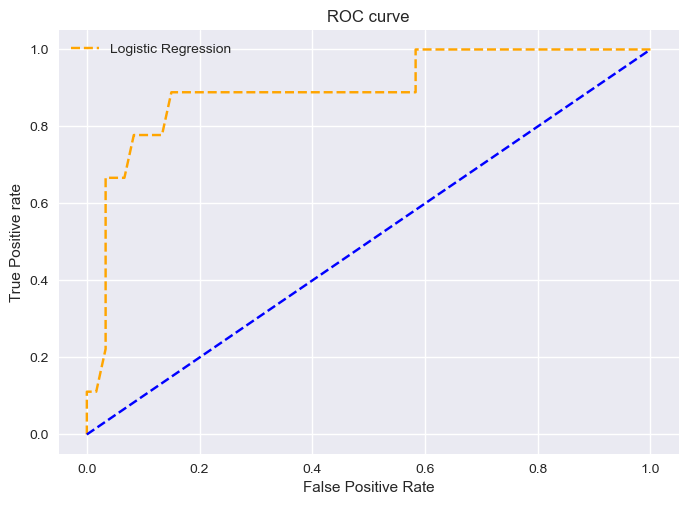

----------------------------------------------------------------
 
Confusion Matrix for L19 with optimal features
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       0.00      0.00      0.00         9

    accuracy                           0.87        69
   macro avg       0.43      0.50      0.47        69
weighted avg       0.76      0.87      0.81        69

ROC Score for L19 with optimal features: 0.5
AUC Score for L19 with optimal features: 0.7074074074074074


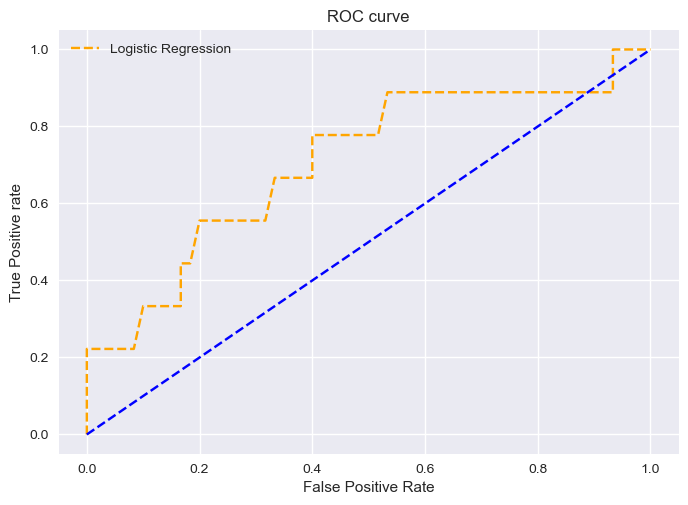

----------------------------------------------------------------
 


In [462]:
for i in range(0,20):
    logisticRegr = LogisticRegression()
    model = logisticRegr.fit(Ls[i].loc[:,get_feat(i)], Ls[i].iloc[:,0])
    predict = model.predict(Ls[i].loc[:,get_feat(i)])
    
    
    pred_prob = model.predict_proba(Ls[i].loc[:,get_feat(i)])
                                              
    fpr, tpr, thresh = roc_curve(Ls[i].iloc[:,0], pred_prob[:,1], pos_label=1)
    random_probs = [0 for j in range(len(Ls[1].iloc[:,0]))]
    p_fpr, p_tpr, _ = roc_curve(Ls[i].iloc[:,0], random_probs, pos_label=1)
                                              
    y = auc_score = roc_auc_score(Ls[i].iloc[:,0], pred_prob[:,1])
    x = roc_auc_score(Ls[i].iloc[:,0], predict)


    print(f'Confusion Matrix for L{i} with optimal features')
    print(classification_report(Ls[i].iloc[:,0], predict))
    pd.DataFrame(confusion_matrix(Ls[i].iloc[:,0], predict), 
                 columns=['Predicted Negative', 'Predicted Positive'], 
                 index=['Actual Negative', 'Actual Positive'])
    print(f'ROC Score for L{i} with optimal features: {x}')
    print(f'AUC Score for L{i} with optimal features: {y}')

    # plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();
    print('----------------------------------------------------------------')
    print(' ')
    i+=1

### 2.a.v

### Making l partitions for test set

In [39]:
def data_n(num):
    gl = globals()
    ls = []
    for i, x in enumerate(test_list):
        concatenated_partitions = concatenate_partitions_horizontally(x, num)
        gl['con%s'%i] = concatenated_partitions
        ls.append(gl['con%s'%i])
# data_n(4)


In [40]:
gl=globals()
def split_num(i):
    x = data_n(i)
    a=[]
    for x in range(len(test_list)):
        a.append(gl['con%s'%x])
#         print(a)
    gl['l_test%s'%i]=pd.concat(a)
    gl['l_test%s'%i]=gl['l_test%s'%i].reset_index(drop=True)

    gl['l_test%s'%i]=gl['l_test%s'%i].drop(['# Columns: time'],axis=1)
    gl['l_test%s'%i]=gl['l_test%s'%i].T.drop_duplicates().T
    gl['l_test%s'%i].columns = pd.io.parsers.base_parser.ParserBase({'usecols': None})._maybe_dedup_names(gl['l_test%s'%i].columns)
    gl['l_test%s'%i] = gl['l_test%s'%i][gl['l_test%s'%i].columns.drop(list(gl['l_test%s'%i].filter(regex='dataset.')))]




#     print(x)
for i in range(1,22):
    split_num(i)

In [41]:
Lt = [l_test1,l_test2,l_test3,l_test4,l_test5,l_test6,l_test7,l_test8,l_test9,l_test10,l_test11,l_test12,
   l_test13,l_test14,l_test15,l_test16,l_test17,l_test18,l_test19,l_test20,l_test21]
for i in range(len(Lt)):
    Lt[i]=Lt[i].groupby('dataset',as_index='False').agg(['mean','median','std'])
    Lt[i].reset_index(inplace=True)
    Lt[i] = Lt[i].rename(columns = {'index':'new column name'})
    Lt[i]['dataset']=0
    Lt[i].loc[0:3, 'dataset'] = 1

In [45]:
# Testing the Classifier on the Test Set, using the extracted features 
# from Recursive Feature Elimination with Cross-Validation


for i in range(0,21):
    logit_model = sm.Logit(Ls[i].iloc[:,0], Ls[i].loc[:,get_feat(i)])
    result=logit_model.fit(method = 'lbfgs',maxiter = 10)
    predict = result.predict(Lt[i].loc[:,get_feat(i)])
    test_error = metric.mean_squared_error(Lt[i].iloc[:,0], predict)

    print('------------------------------------')
    print(f'************ For L={i} ***************')
    print(f'Test MSE: {test_error}')
    print('------------------------------------')
    print(result.summary())
    i+=1

Accuracy of the test score is less as compared to that of train set.

### 2.v

The classes seem to be well separated as python was issuing a warning for this.  I changed the max iter parameter to solve this problem. Parameters for this logistic regression are unstable and its p-values are unreliable.
A solution for this is Linear Discriminant Analysis as it does not suffer for this problem of instbaility.

### 2.vi

Yes I can see imbalanced classes with bending being rare as compared to other classes.
To fix this, I will do upsampling.

Upsampling the rare class (class 'bending')

In [543]:
i=0

for x in Ls:

    y = x.iloc[:,0]
    X = x.iloc[:,1:]
    y = np.where((y == 0), 0, 1)
    i_class0 = np.where(y == 0)[0]
    i_class1 = np.where(y == 1)[0]
    s_class0 = len(i_class0)
    s_class1 = len(i_class1)
    i_class0_upsampled = np.random.choice(i_class0, size=s_class1, replace=True)
    y_t = Lt[i].iloc[:,0]
    X_t = Lt[i].iloc[:,1:]
    y_t = np.where((y_t == 0), 0, 1)
    i_class0 = np.where(y_t == 0)[0]
    i_class1 = np.where(y_t == 1)[0]
    s_class0 = len(i_class0)
    s_class1 = len(i_class1)

#     min_features_to_select = 1  
    clf = LogisticRegression(penalty='none' ,max_iter=1000) # oversampling to deal with imbalance
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)
#     rfecv = RFECV(
#         estimator=clf,
#         step=1,
#         cv=cv,
#         scoring="accuracy",
#         min_features_to_select=min_features_to_select,
#         n_jobs=2
#     )
    clf.fit(X, y)

    train_score = clf.score(X, y)
    predict = clf.predict(X_t.values)
    test_score = clf.score(X_t,predict)


#     print(f'Classification Report for l = {i}:, {classification_report(y, predict)}')
    print(f"  (train score = {train_score}),(test score = {test_score})")
    print('---------------------------------------------------------------')
    i+=1

  (train score = 0.927536231884058),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(test score = 1.0)
---------------------------------------------------------------
  (train score = 0.9565217391304348),(tes

### 4.b.i Binary Classification Using L1 penalized Logistic Regression
####  Using L1 penalty for feature selection by penalizing the sum of absolute values of the weights


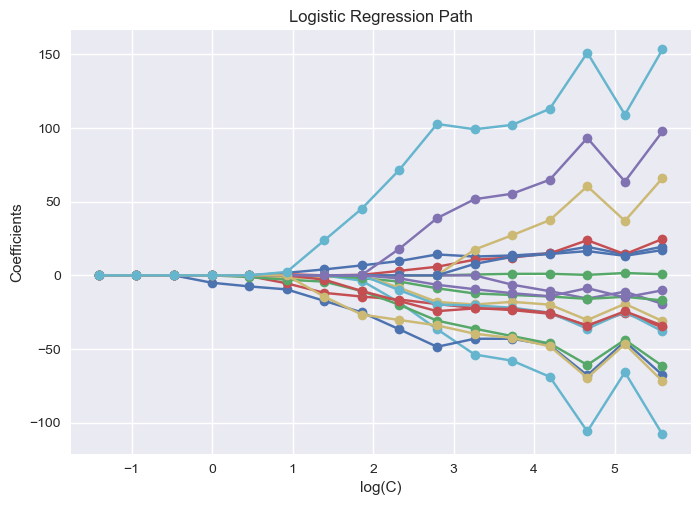

l=0, train error = 0.07246376811594203


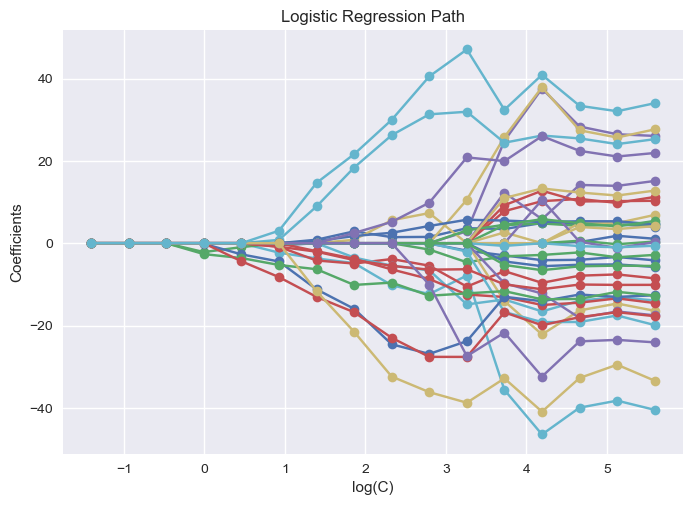

l=1, train error = 0.07246376811594203


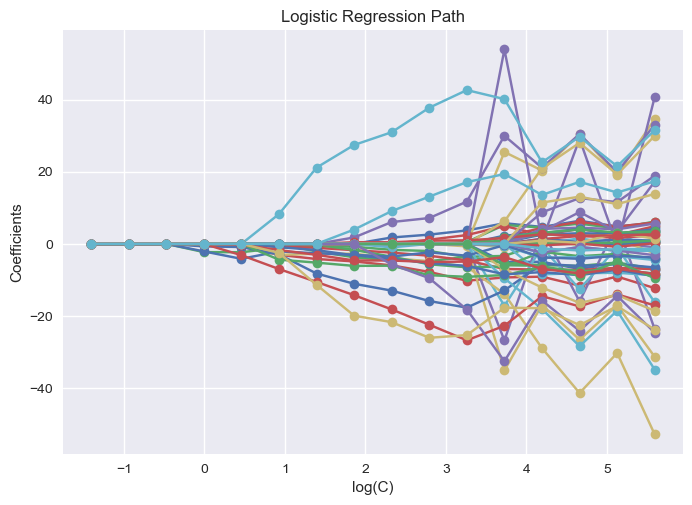

l=2, train error = 0.043478260869565216


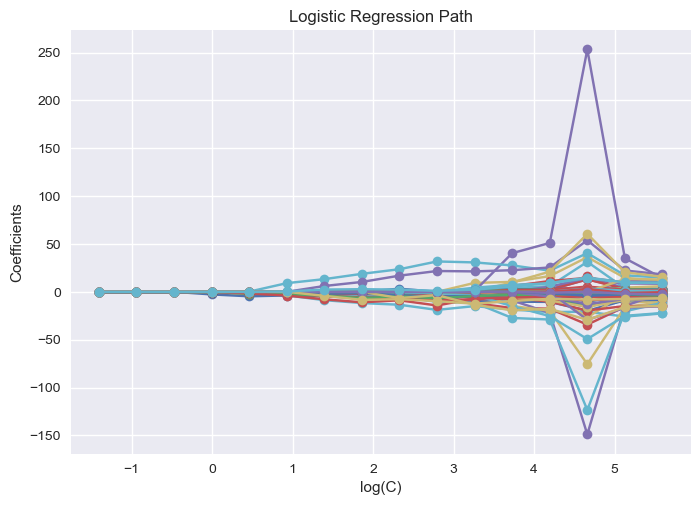

l=3, train error = 0.043478260869565216


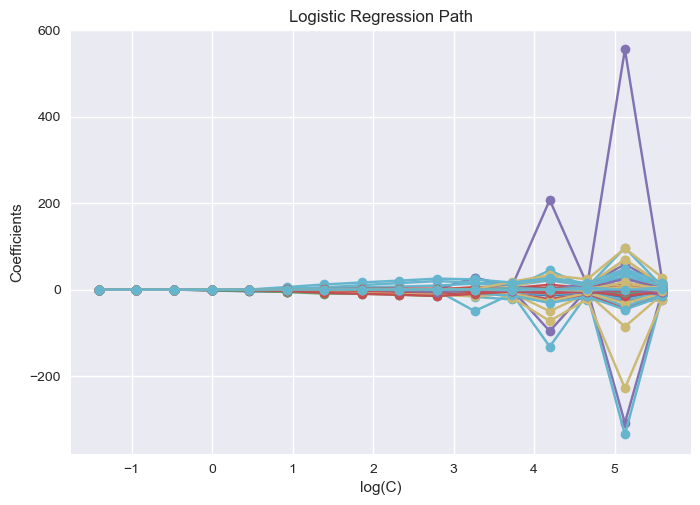

l=4, train error = 0.043478260869565216


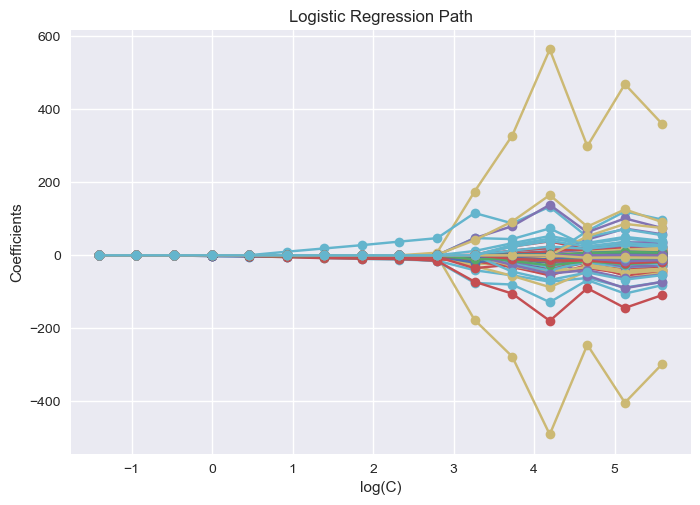

l=5, train error = 0.043478260869565216


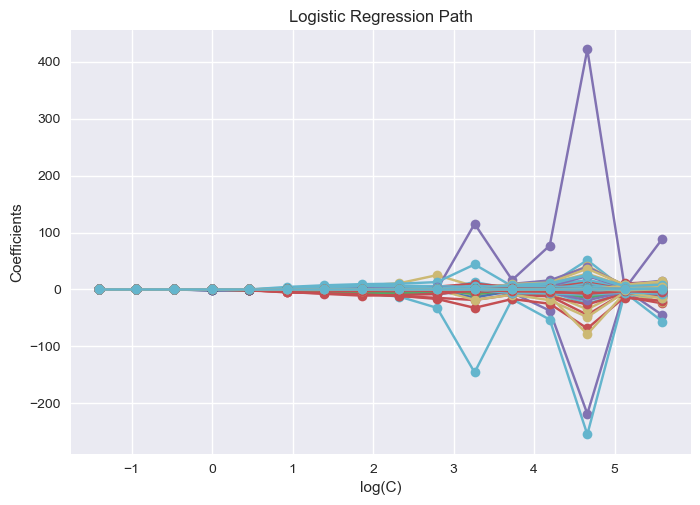

l=6, train error = 0.043478260869565216


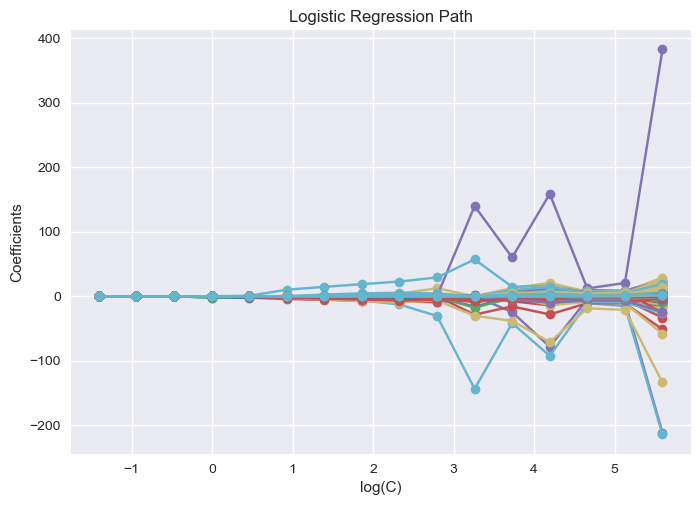

l=7, train error = 0.043478260869565216


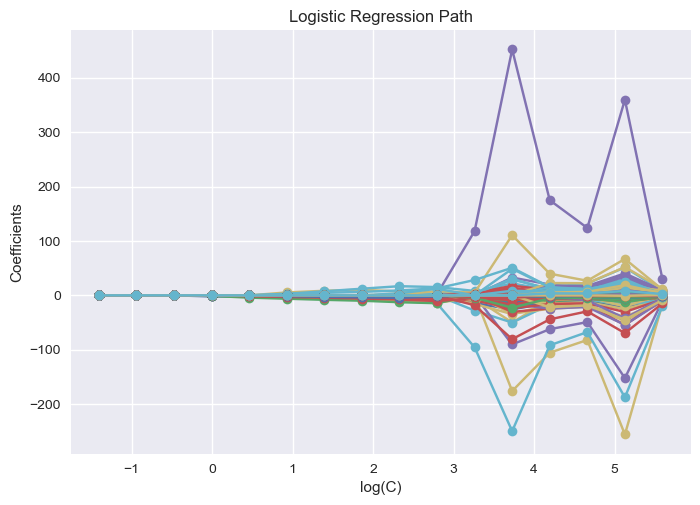

l=8, train error = 0.043478260869565216


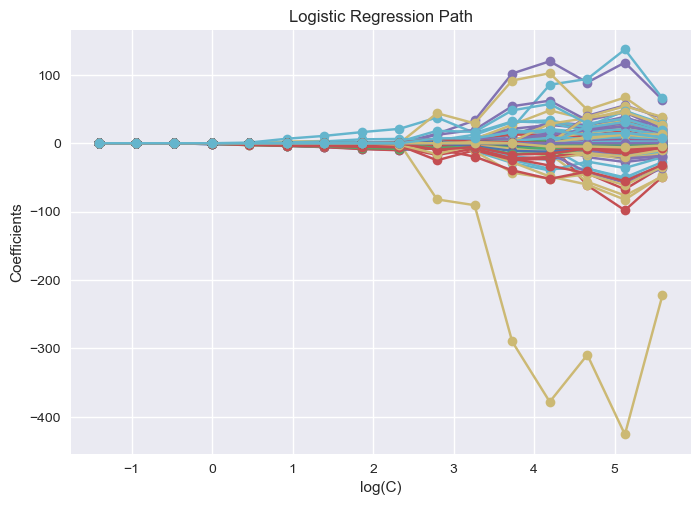

l=9, train error = 0.043478260869565216


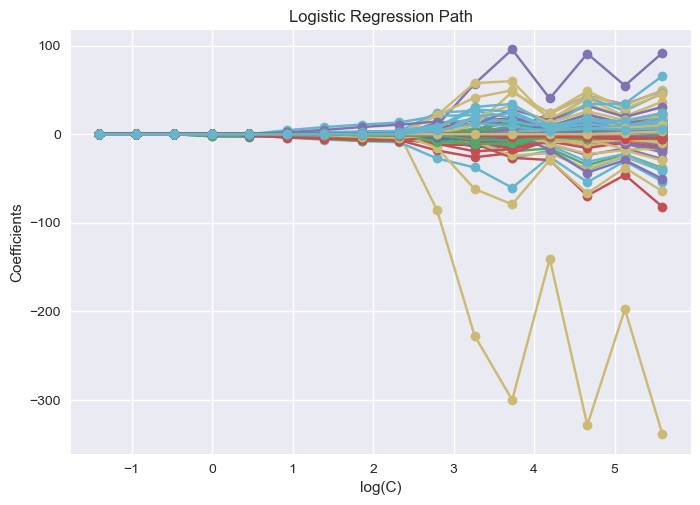

l=10, train error = 0.043478260869565216


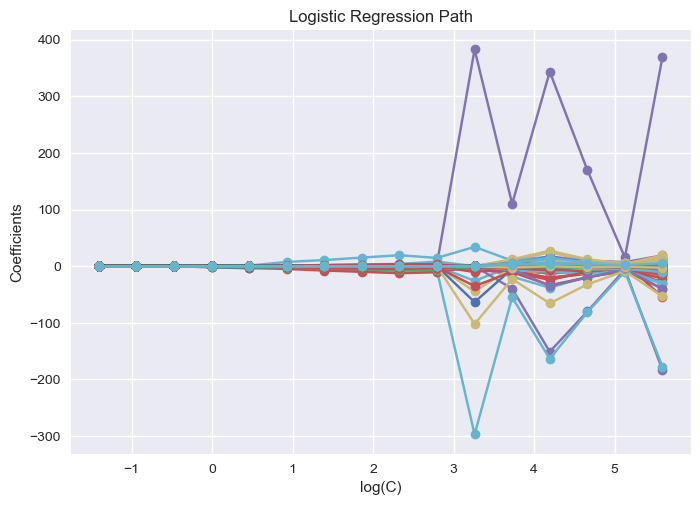

l=11, train error = 0.043478260869565216


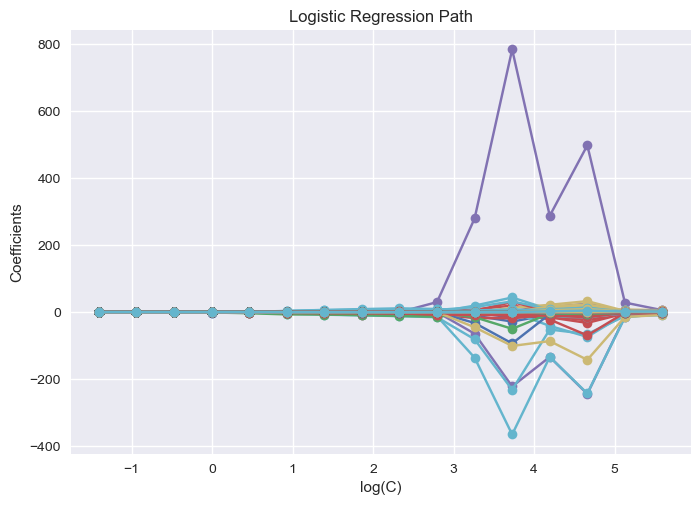

l=12, train error = 0.043478260869565216


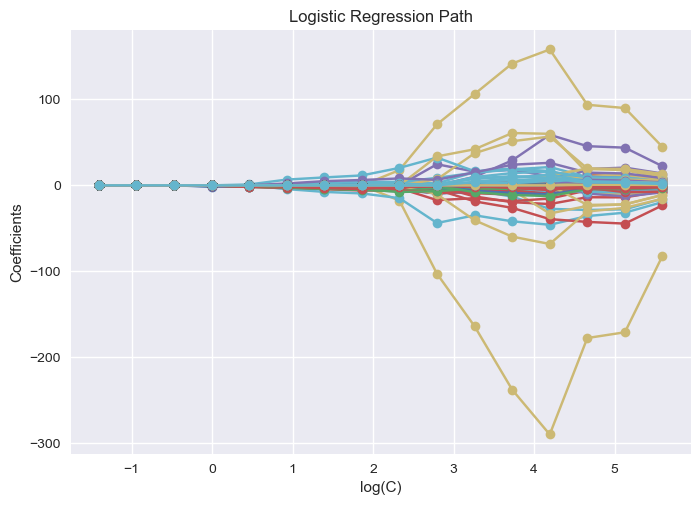

l=13, train error = 0.043478260869565216


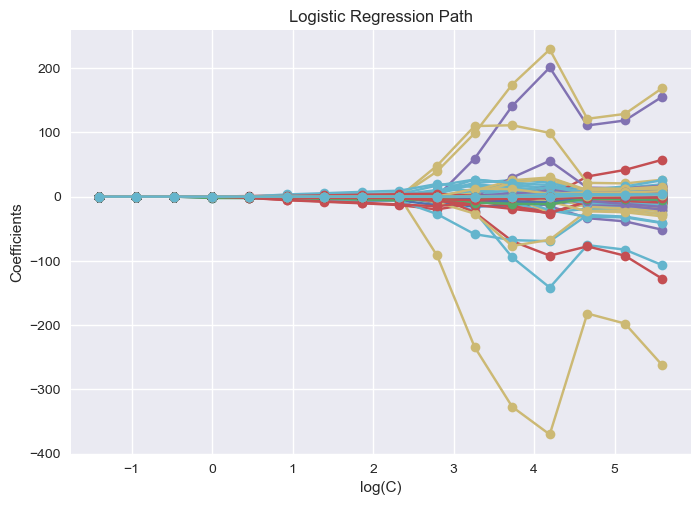

l=14, train error = 0.043478260869565216


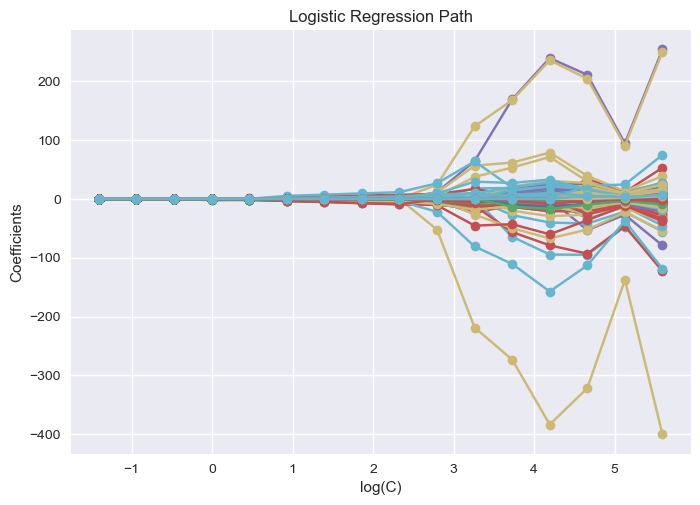

l=15, train error = 0.043478260869565216


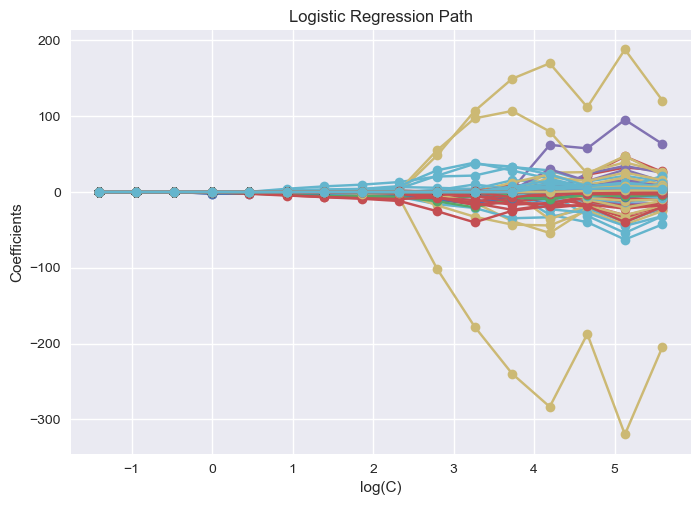

l=16, train error = 0.043478260869565216


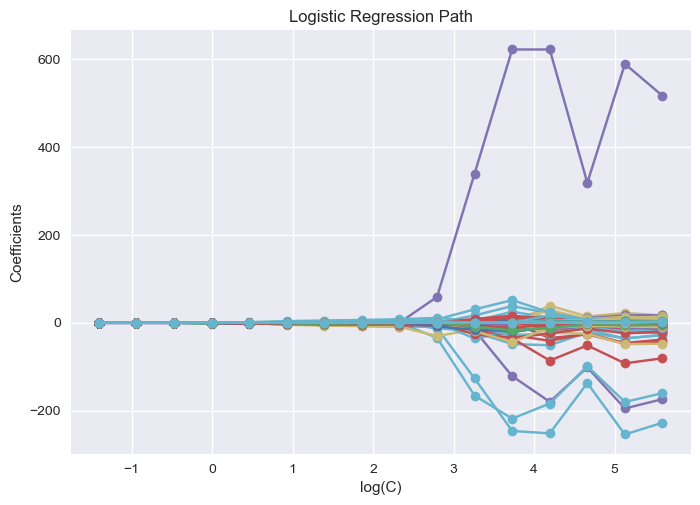

l=17, train error = 0.043478260869565216


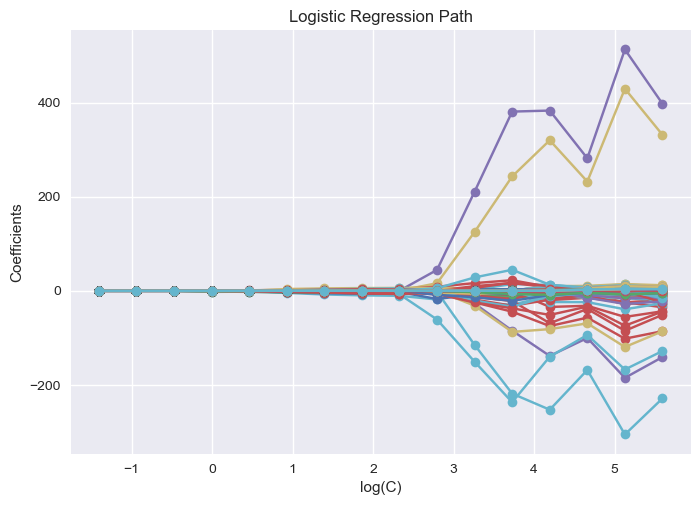

l=18, train error = 0.043478260869565216


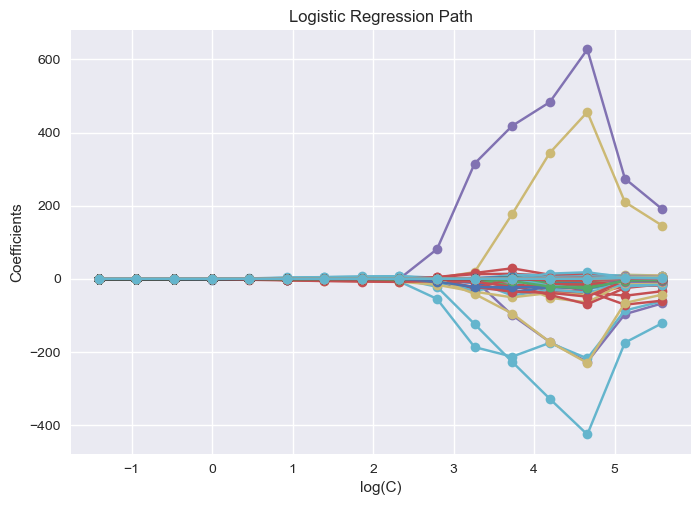

l=19, train error = 0.043478260869565216


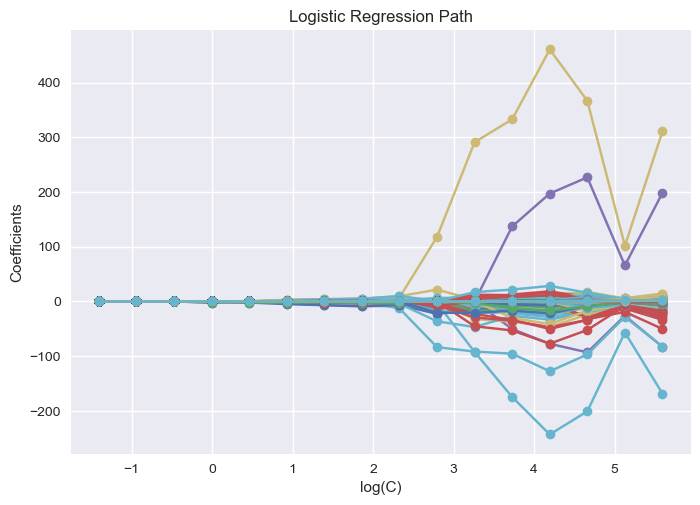

l=20, train error = 0.043478260869565216


In [486]:
#  Normalizing the features

i=0
for x in Ls:

    y = x.iloc[:,0]
    X = x.iloc[:,1:]

    X = X[y != 2]
    y = y[y != 2]

    X /= X.max() 

    cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)

    clf = linear_model.LogisticRegression(
        penalty="l1",
        solver="liblinear",
        tol=1e-6,
        max_iter=int(1e6),
        warm_start=True,
        intercept_scaling=10000.0,
    )
    coefs_ = []
    for c in cs:
        clf.set_params(C=c)
        clf.fit(X, y)
        coefs_.append(clf.coef_.ravel().copy())
    coefs_ = np.array(coefs_)

    predict = clf.predict(X)
    trainerror = metric.mean_squared_error(y, predict)
    
    plt.plot(np.log10(cs), coefs_, marker="o")
    ymin, ymax = plt.ylim()
    plt.xlabel("log(C)")
    plt.ylabel("Coefficients")
    plt.title("Logistic Regression Path")
    plt.axis("tight")
    plt.show()
    print(f'l={i}, train error = {trainerror}')
    i+=1
    
    
# reference: sklearn.org

### 4.b.ii
L1-penalized logistic regression is better in terms of ease as it automatically performs feature selection.  Moreover, It has better model accuracy especially in this case where classes are well-separated and the model is instable 

### 2.c.i

### Making multiclesses for multinomial regression
#### Using the kth class as the base class

In [46]:
Ls=[l_train1,l_train2,l_train3,l_train4,l_train5,l_train6,l_train7,l_train8,l_train9,l_train10,l_train11,l_train12,
   l_train13,l_train14,l_train15,l_train16,l_train17,l_train18,l_train19,l_train20,l_train21]
for i in range(len(Ls)):
    Ls[i]=Ls[i].groupby('dataset',as_index='False').agg(['mean','median','std'])
    Ls[i].reset_index(inplace=True)
    Ls[i] = Ls[i].rename(columns = {'index':'new column name'})
    Ls[i]['dataset']=0
    Ls[i].loc[19:27, 'dataset'] = 1
    Ls[i].loc[28:39, 'dataset'] = 2
    Ls[i].loc[40:51, 'dataset'] = 3
    Ls[i].loc[52:63, 'dataset'] = 4
    Ls[i].loc[64:75, 'dataset'] = 5
    Ls[i].loc[28:49, 'dataset'] = 6
    Ls[i].loc[28:49, 'dataset'] = 7
    Ls[i].loc[28:49, 'dataset'] = 8
#     Ls[i].loc[75:87, 'dataset'] = 2

In [47]:
# Making multiclasses for the test set


Lt = [l_test1,l_test2,l_test3,l_test4,l_test5,l_test6,l_test7,l_test8,l_test9,l_test10,l_test11,l_test12,
   l_test13,l_test14,l_test15,l_test16,l_test17,l_test18,l_test19,l_test20,l_test21]
for i in range(len(Lt)):
    Lt[i]=Lt[i].groupby('dataset',as_index='False').agg(['mean','median','std'])
    Lt[i].reset_index(inplace=True)
    Lt[i] = Lt[i].rename(columns = {'index':'new column name'})
    Lt[i]['dataset']=0
    Lt[i].loc[0:3, 'dataset'] = 1
    Lt[i].loc[4:6, 'dataset'] = 2
    Lt[i].loc[7:9, 'dataset'] = 3
    Lt[i].loc[10:12, 'dataset'] = 4
    Lt[i].loc[13:15, 'dataset'] = 5
#     Lt[i].loc[16:18, 'dataset'] = 6


In [103]:
#  Logistic Regression for Multiclass Regression with L1 Regularization


i=0
for X in Ls:
    y = X.iloc[:,0]
    X = X.iloc[:,1:]
    y_t = Lt[i].iloc[:,0]
    X_t = Lt[i].iloc[:,1:]

    X = X[y != 2]
    y = y[y != 2]

    X /= X.max() 
    
    X_t = X_t[y_t != 2]
    y_t = y_t[y_t != 2]

    X_t /= X_t.max()

    clf = LogisticRegression(penalty='l1' ,max_iter=100000, multi_class='multinomial',solver = 'saga')
    
    result = clf.fit(X, y)
    score = clf.score(X, y)    

    train_score = clf.score(X, y)
    test_score = clf.score(X_t,y_t)

    cvscore = cross_val_score(clf, X, y, cv=5)

                                              

    print(f"l = {i},  (train score = {train_score}),(test score = {test_score})")
    print(' ')
    print(f'cross validation score {cvscore}')
    print(' ')
    print('---------------------------------------------------------------')
    i+=1

l = 0,  (train score = 0.4782608695652174),(test score = 0.0)
 
cross validation score [0.14285714 0.28571429 0.42857143 0.57142857 0.23076923]
 
---------------------------------------------------------------
l = 1,  (train score = 0.5362318840579711),(test score = 0.0)
 
cross validation score [0.21428571 0.42857143 0.35714286 0.42857143 0.23076923]
 
---------------------------------------------------------------
l = 2,  (train score = 0.5942028985507246),(test score = 0.0)
 
cross validation score [0.07142857 0.42857143 0.35714286 0.35714286 0.30769231]
 
---------------------------------------------------------------
l = 3,  (train score = 0.5507246376811594),(test score = 0.0)
 
cross validation score [0.07142857 0.42857143 0.5        0.42857143 0.23076923]
 
---------------------------------------------------------------
l = 4,  (train score = 0.6231884057971014),(test score = 0.0)
 
cross validation score [0.28571429 0.35714286 0.42857143 0.28571429 0.30769231]
 
--------------

Best L is L = 14 with the highest cross validation score for all classes

### 2.c.ii

In [92]:
# Training Gaussian Naive Bayes For Multiclass Regression


i=0
for X in Ls:

    X_tr=X.iloc[:,1:]
    y_tr=X.iloc[:,0]
    X_t=Lt[i].iloc[:,1:]
    y_t=Lt[i].iloc[:,0]
    clf = GaussianNB()
    
    result = clf.fit( X_tr,y_tr)
    train_score = clf.score(X_tr, y_tr)
    test_score = clf.score(X_t, y_t)
#     print(X.shape)
    predict = clf.predict(X_t)
    
    
    pred_prob = clf.predict_proba(X_t)
    cvscore = cross_val_score(clf, X_tr, y_tr, cv=5)
                                              
#     fpr, tpr, thresh = roc_curve(X_tr, pred_prob[:,1], pos_label=1)
#     random_probs = [0 for j in range(len(X_tr))]
#     p_fpr, p_tpr, _ = roc_curve(X_tr, random_probs, pos_label=1)
                                              


    print(f"l = {i},  (train score = {train_score}), (test score = {test_score})")
    print(' ')
    print(f'cross validation score {cvscore}')
    print(' ')

    print('---------------------------------------------------------------')
    i+=1

l = 0,  (train score = 0.6521739130434783), (test score = 0.0)
 
cross validation score [0.         0.35714286 0.71428571 0.28571429 0.        ]
 
---------------------------------------------------------------
l = 1,  (train score = 0.6376811594202898), (test score = 0.0)
 
cross validation score [0.         0.28571429 0.78571429 0.35714286 0.        ]
 
---------------------------------------------------------------
l = 2,  (train score = 0.5942028985507246), (test score = 0.0)
 
cross validation score [0.         0.28571429 0.57142857 0.14285714 0.        ]
 
---------------------------------------------------------------
l = 3,  (train score = 0.5942028985507246), (test score = 0.0)
 
cross validation score [0.         0.21428571 0.71428571 0.28571429 0.        ]
 
---------------------------------------------------------------
l = 4,  (train score = 0.5652173913043478), (test score = 0.0)
 
cross validation score [0.         0.28571429 0.57142857 0.21428571 0.        ]
 
---------

Best L is L = 7 with the highest cross validation score for all classes

Using Multinomial Priors

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.50      0.33      0.40         9
           3       0.17      1.00      0.29         2
           4       0.00      0.00      0.00        12
           5       0.22      1.00      0.36         5
           8       0.60      0.27      0.37        22

    accuracy                           0.45        69
   macro avg       0.39      0.57      0.37        69
weighted avg       0.51      0.45      0.43        69

l = 0,  (train score = 0.4492753623188406), (test score = 0.0)
 
cross validation score :[0.42857143 0.57142857 0.57142857 0.5        0.38461538]
 
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.57      0.44      0.50         9
           3       0.13      1.00      0.24         2
           4       0.00     

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.60      0.33      0.43         9
           3       0.12      1.00      0.22         2
           4       0.00      0.00      0.00        12
           5       0.15      1.00      0.26         5
           8       0.00      0.00      0.00        22

    accuracy                           0.32        69
   macro avg       0.28      0.49      0.27        69
weighted avg       0.31      0.32      0.28        69

l = 12,  (train score = 0.3188405797101449), (test score = 0.0)
 
cross validation score :[0.14285714 0.28571429 0.14285714 0.07142857 0.07692308]
 
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.57      0.44      0.50         9
           3       0.11      1.00      0.20         2
           4       0.00    

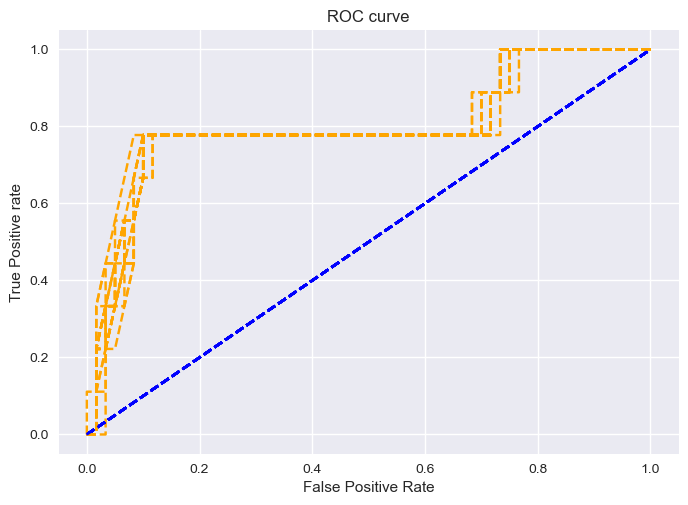

In [94]:
i=0
for X in Ls:


    clf = MultinomialNB()

    
    result = clf.fit( X.iloc[:,1:],X.iloc[:,0])
    train_score = clf.score(X.iloc[:,1:], X.iloc[:,0])
    test_score = clf.score(Lt[i].iloc[:,1:], Lt[i].iloc[:,0])
    predict = clf.predict(X.iloc[:,1:])
    
    
    pred_prob = clf.predict_proba(X.iloc[:,1:])
                                              
    fpr, tpr, thresh = roc_curve(X.iloc[:,0], pred_prob[:,1], pos_label=1)
    random_probs = [0 for j in range(len(Ls[1].iloc[:,0]))]
    p_fpr, p_tpr, _ = roc_curve(Ls[i].iloc[:,0], random_probs, pos_label=1)
    cvscore = cross_val_score(clf, X, y, cv=5)

                                              
    print(classification_report(Ls[i].iloc[:,0], predict))

#     # plot roc curves
    plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')


    print(f"l = {i},  (train score = {train_score}), (test score = {test_score})")
    print(' ')
    print(f'cross validation score :{cvscore}')
    print(' ')
    print('---------------------------------------------------------------')
    i+=1

Best L is L=1 with high cross validation score for all classes

### 2.c.iii

Since are features are not mixed (continuous and discrete), 
and are also not independent of each other, as we know that Naive Bayes is not robust to redundant attributes,
I beliebe Naive Bayes with Multinomial Priors is better since it does not need the Gaussian assumpiton. It is also more robust to ROC hence is the better choice

### ISLR 4.8.3



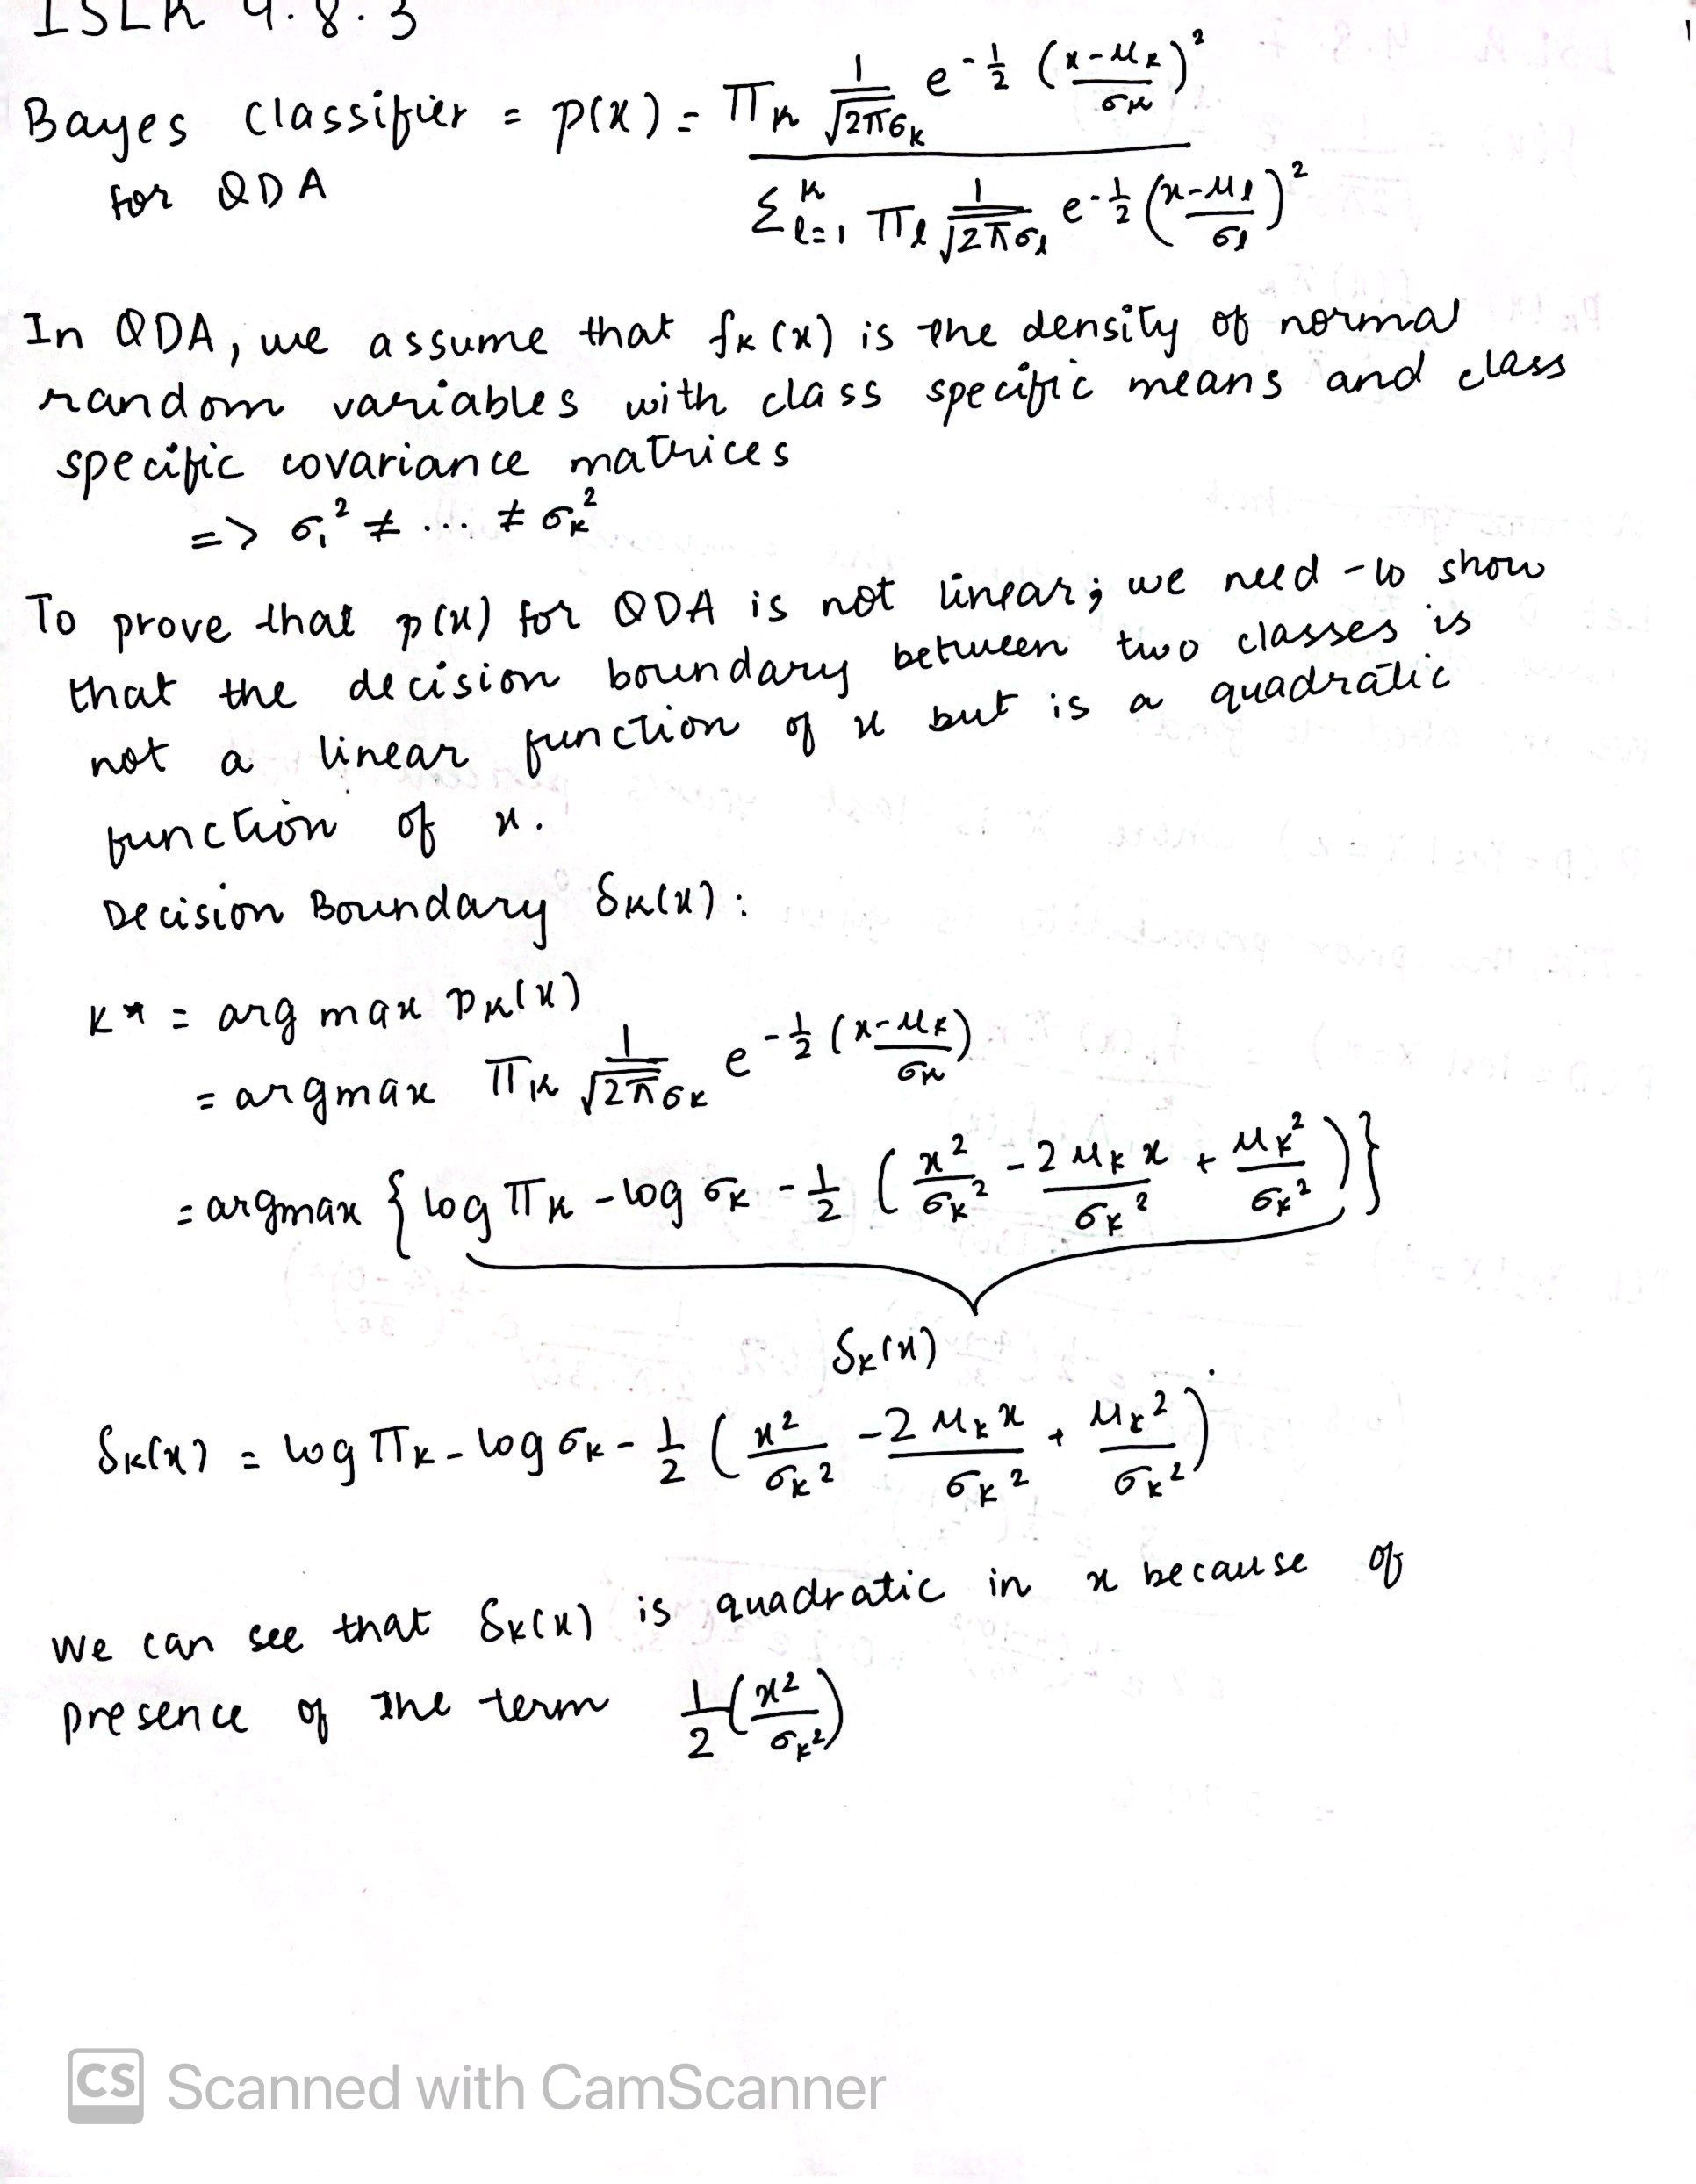

### ISLR 4.8.7

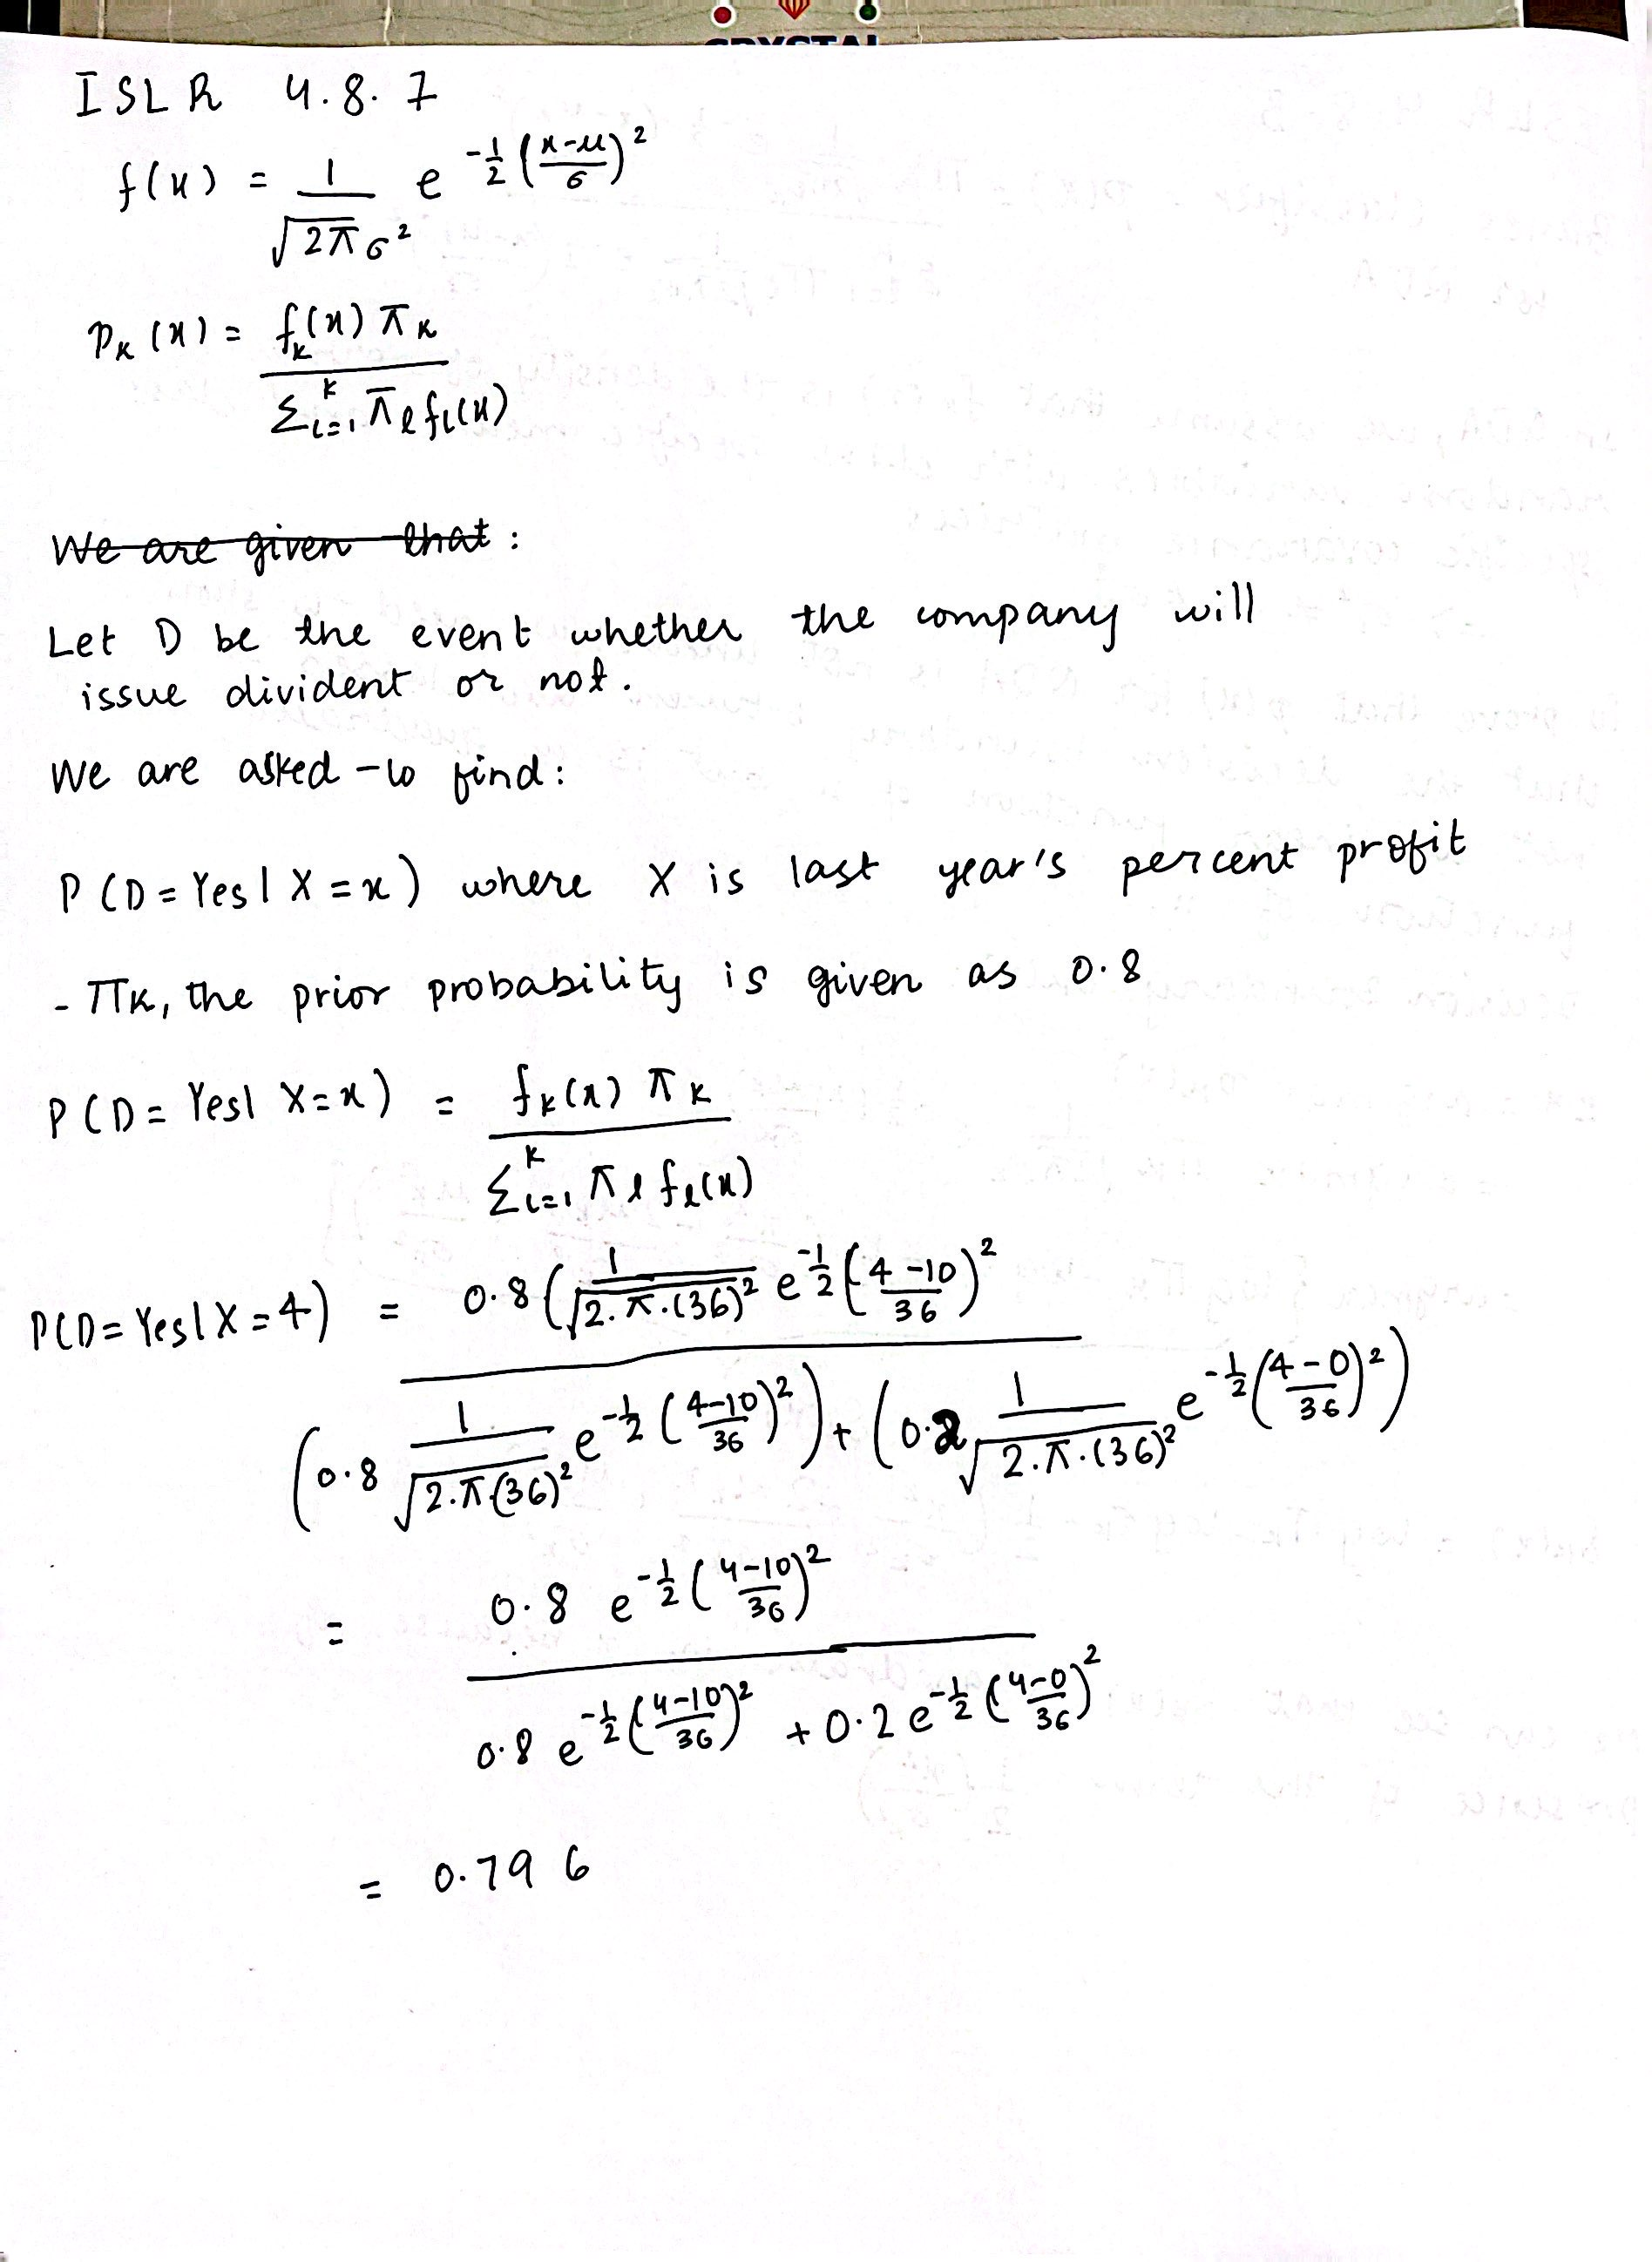